In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
from collections import Counter


import pandas as pd
import numpy as np

import requests
import io

import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

#這一行表示不希望看到警告訊息
warnings.filterwarnings(action='ignore')
#顯示中文
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

data = pd.read_csv("heart.csv")
data 

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [2]:
print("資料筆數:",len(data)) #Row
print("欄位數量",len(data.columns)) #column
data.info() #資料集中的筆數、型態

資料筆數: 918
欄位數量 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
data.Cholesterol.value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

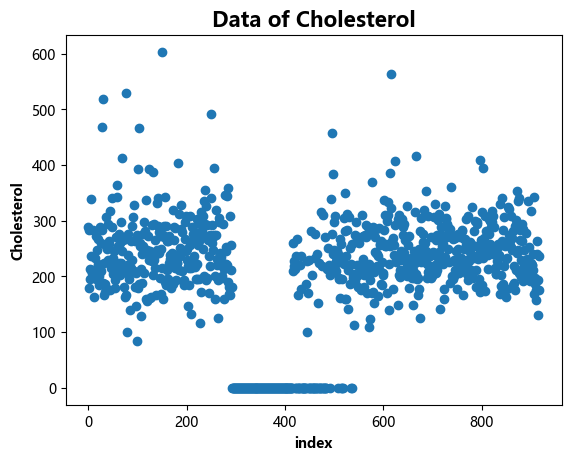

In [4]:
#設定x座標標題及粗體
plt.xlabel("index", fontweight = "bold") 
#設定y座標標題及粗體
plt.ylabel("Cholesterol", fontweight = "bold")  
#設定標題、字大小及粗體
plt.title("Data of Cholesterol", fontsize = 15, fontweight = "bold") 
plt.scatter(data.index          # x軸資料
            ,data['Cholesterol']  # y軸資料
           )

In [5]:
data.RestingBP.value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

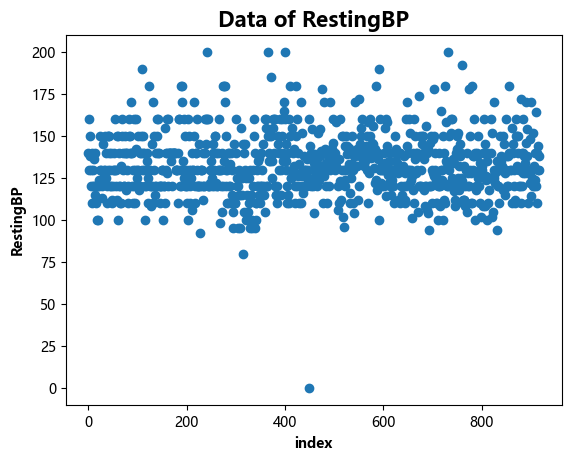

In [6]:
#設定x座標標題及粗體
plt.xlabel("index", fontweight = "bold") 
#設定y座標標題及粗體
plt.ylabel("RestingBP", fontweight = "bold")  
#設定標題、字大小及粗體
plt.title("Data of RestingBP", fontsize = 15, fontweight = "bold") 
plt.scatter(data.index          # x軸資料
            ,data['RestingBP']  # y軸資料
           )

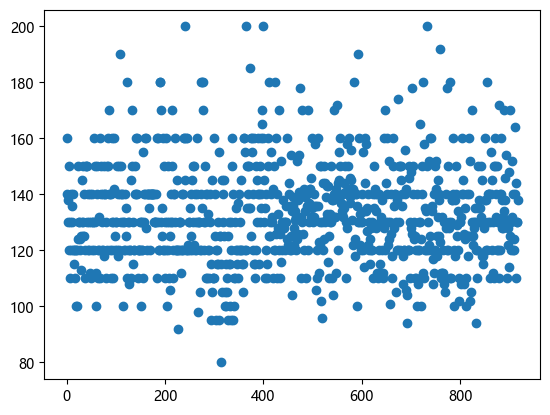

In [7]:
#整理調心律值為0的數據
data =data.drop(data['RestingBP'][data['RestingBP']==0].index)
plt.scatter(data.index,data['RestingBP'])

In [8]:
data['Cholesterol'] = data['Cholesterol'].replace([0],np.nan)
df2=data.copy()
df2.Cholesterol.value_counts()

254.0    11
223.0    10
220.0    10
216.0     9
230.0     9
         ..
347.0     1
365.0     1
412.0     1
491.0     1
131.0     1
Name: Cholesterol, Length: 221, dtype: int64

<Figure size 1500x1000 with 0 Axes>

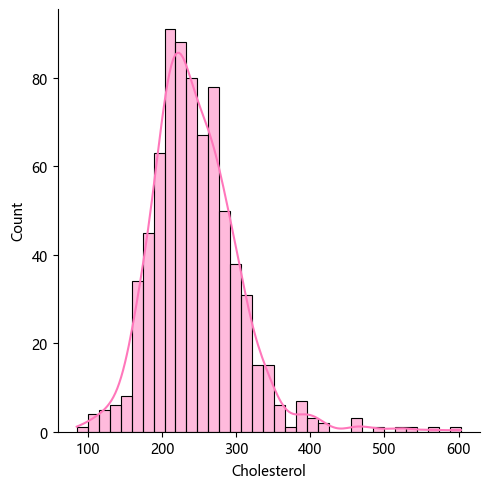

In [9]:
#The distribution of the data of the column
plt.figure(figsize=(15,10))
sns.displot(data = df2, x = "Cholesterol", kde = True,color='#ff77bb')

In [10]:
data.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [11]:
#filling the missings randomly
#非NULL的所值的平均數塞入Cholesterol的NULL區
fill_list = data["Cholesterol"].dropna() #非NULL的所值
#df2 = data["Cholesterol"].fillna(pd.Series(np.random.choice(fill_list, size = len(data.index))))
df2 = data["Cholesterol"].fillna(fill_list.mean())
df2

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 917, dtype: float64

In [12]:
df2.value_counts()
df2.isnull().sum()

0

In [13]:
#將膽固醇資料為0的補上
data["Cholesterol"] = df2
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140        289.0          0     Normal    172   
1   49   F           NAP        160        180.0          0     Normal    156   
2   37   M           ATA        130        283.0          0         ST     98   
3   48   F           ASY        138        214.0          0     Normal    108   
4   54   M           NAP        150        195.0          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [14]:
#檢查類別型態的欄位
cat_cols =["Sex","ChestPainType","FastingBS"
               ,"RestingECG","ExerciseAngina","ST_Slope","HeartDisease"]
cat_cols 

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [15]:
#檢查類別型態的欄位
categoricals=["Sex","ChestPainType","FastingBS"
               ,"RestingECG","ExerciseAngina","ST_Slope"]
categoricals

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

In [16]:
#數值欄位
#mistyped=['Age','RestingBP','FastingBS','Cholesterol','MaxHR','Oldpeak','HeartDisease']
numeric=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
numeric
#type(numeric)


['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [17]:
#檢視數值欄位的敘述型統計
data[numeric].describe(include='all')
 #  count：数量统计，此列共有多少有效值
 #  unipue：不同的值有多少个
 #  std：标准差
 #  min：最小值
 #  25%：四分之一分位数
 #  50%：二分之一分位数
 #  75%：四分之三分位数
 #  max：最大值
 #  mean：均值

Age   RestingBP  Cholesterol       MaxHR     Oldpeak
count  917.000000  917.000000   917.000000  917.000000  917.000000
mean    53.509269  132.540894   244.635389  136.789531    0.886696
std      9.437636   17.999749    53.347125   25.467129    1.066960
min     28.000000   80.000000    85.000000   60.000000   -2.600000
25%     47.000000  120.000000   214.000000  120.000000    0.000000
50%     54.000000  130.000000   244.635389  138.000000    0.600000
75%     60.000000  140.000000   267.000000  156.000000    1.500000
max     77.000000  200.000000   603.000000  202.000000    6.200000

In [18]:
#檢查欄位遺缺值狀態
data.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [19]:
#整理完的資料
for i in enumerate(data.columns): #drop 刪除欄位 axis(軸)
    print('順序:{}, 每個欄位的獨立值 in "{}":\n'.format(i[0]+1,i[1]),data[i[1]].unique()) #找出獨立值

順序:1, 每個欄位的獨立值 in "Age":
 [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
順序:2, 每個欄位的獨立值 in "Sex":
 ['M' 'F']
順序:3, 每個欄位的獨立值 in "ChestPainType":
 ['ATA' 'NAP' 'ASY' 'TA']
順序:4, 每個欄位的獨立值 in "RestingBP":
 [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116 144 154 134 104 139 131 141 178 146 158 123 102  96 143
 172 156 114 127 101 174  94 148 117 192 129 164]
順序:5, 每個欄位的獨立值 in "Cholesterol":
 [289.         180.         283.         214.         195.
 339.         237.         208.         207.         284.
 211.         164.         204.         234.         273.
 196.         201.         248.         267.         223.
 184.         288.         215.         209.         260.
 468.         188.         518.         167.         224.
 172.         186.         254.         

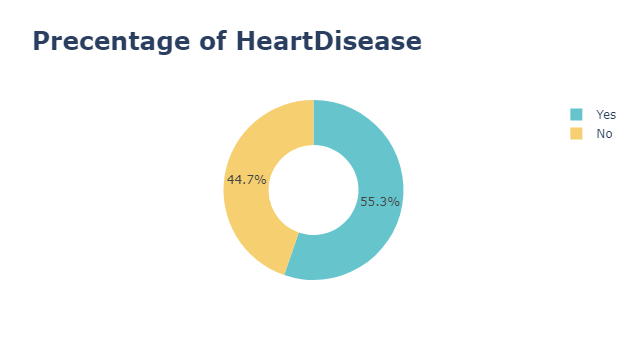

In [20]:
fig=px.pie(data,names=['Yes','No'],values=data['HeartDisease'].value_counts(),hole=0.5,
           title="<b>Precentage of HeartDisease ",template='plotly',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_font_size=25)

fig.show()


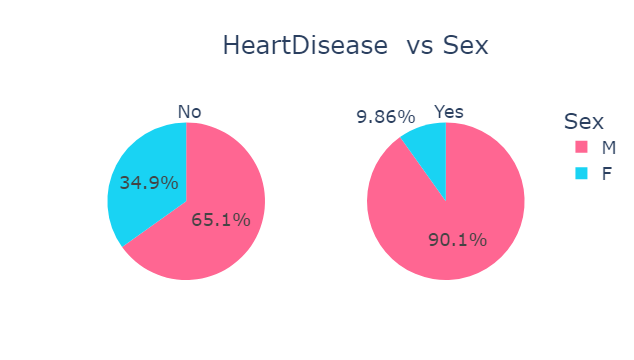

In [21]:
counts0 = Counter(data[data['HeartDisease']==0]['Sex'])
counts1 = Counter(data[data['HeartDisease']==1]['Sex'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

#陰
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name=" No",title=' No'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF6692']))
#陽
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name=" Yes",title=' Yes'),
    row=1, col=2)

fig.update_layout(
    title={'text':'HeartDisease  vs Sex','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Sex",
    font=dict(size=18)
)

fig.show()

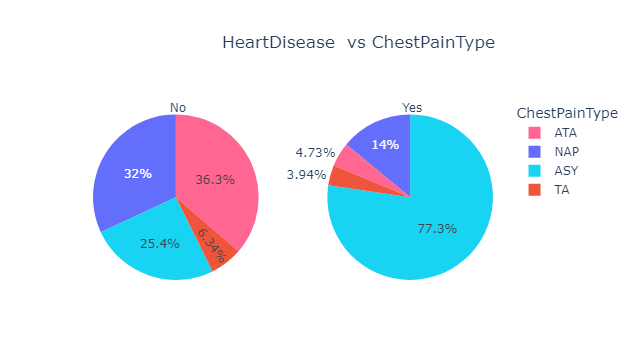

In [22]:
counts0 = Counter(data[data['HeartDisease']==0]['ChestPainType'])
counts1 = Counter(data[data['HeartDisease']==1]['ChestPainType'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

#陰
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name=" No",title=' No'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF6692']))
#陽
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name=" Yes",title=' Yes'),
    row=1, col=2)

fig.update_layout(
    title={'text':'HeartDisease  vs ChestPainType','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="ChestPainType",
    font=dict(size=12)
)

fig.show()

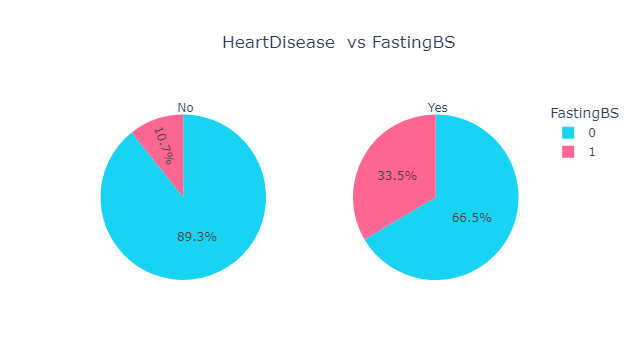

In [23]:
counts0 = Counter(data[data['HeartDisease']==0]['FastingBS'])
counts1 = Counter(data[data['HeartDisease']==1]['FastingBS'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

#陰
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name=" No",title=' No'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF6692']))
#陽
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name=" Yes",title=' Yes'),
    row=1, col=2)

fig.update_layout(
    title={'text':'HeartDisease  vs FastingBS','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="FastingBS",
    font=dict(size=12)
)

fig.show()

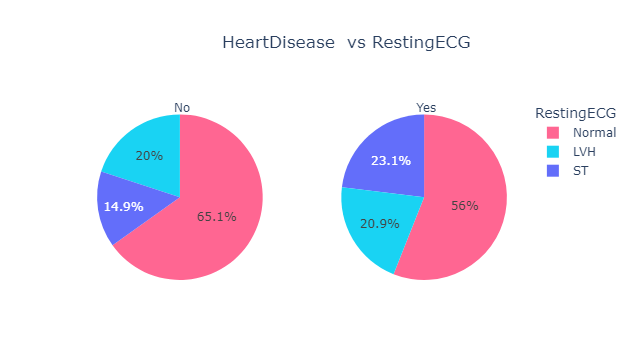

In [24]:
counts0 = Counter(data[data['HeartDisease']==0]['RestingECG'])
counts1 = Counter(data[data['HeartDisease']==1]['RestingECG'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

#陰
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name=" No",title=' No'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF6692']))
#陽
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name=" Yes",title=' Yes'),
    row=1, col=2)

fig.update_layout(
    title={'text':'HeartDisease  vs RestingECG','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="RestingECG",
    font=dict(size=12)
)

fig.show()

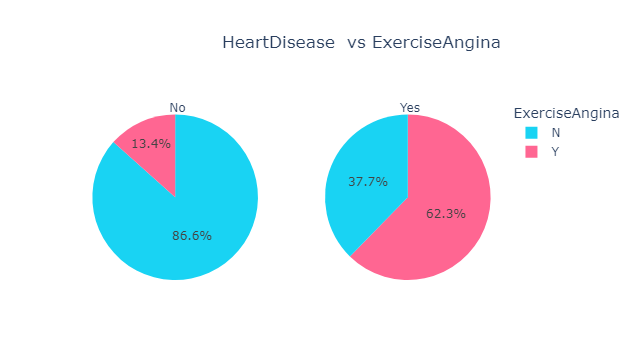

In [25]:
counts0 = Counter(data[data['HeartDisease']==0]['ExerciseAngina'])
counts1 = Counter(data[data['HeartDisease']==1]['ExerciseAngina'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

#陰
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name=" No",title=' No'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF6692']))
#陽
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name=" Yes",title=' Yes'),
    row=1, col=2)

fig.update_layout(
    title={'text':'HeartDisease  vs ExerciseAngina','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="ExerciseAngina",
    font=dict(size=12)
)

fig.show()

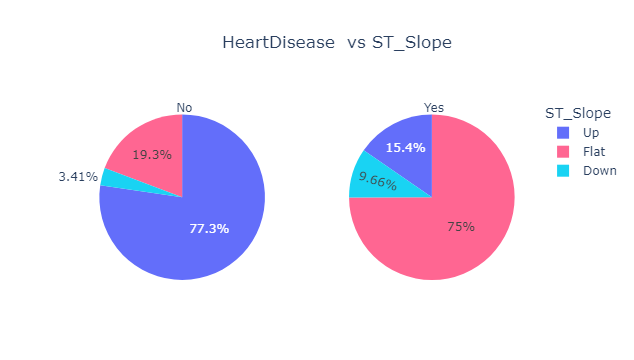

In [26]:
counts0 = Counter(data[data['HeartDisease']==0]['ST_Slope'])
counts1 = Counter(data[data['HeartDisease']==1]['ST_Slope'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

#陰
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name=" No",title=' No'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF6692']))
#陽
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name=" Yes",title=' Yes'),
    row=1, col=2)

fig.update_layout(
    title={'text':'HeartDisease  vs ST_Slope','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="ST_Slope",
    font=dict(size=12)
)

fig.show()

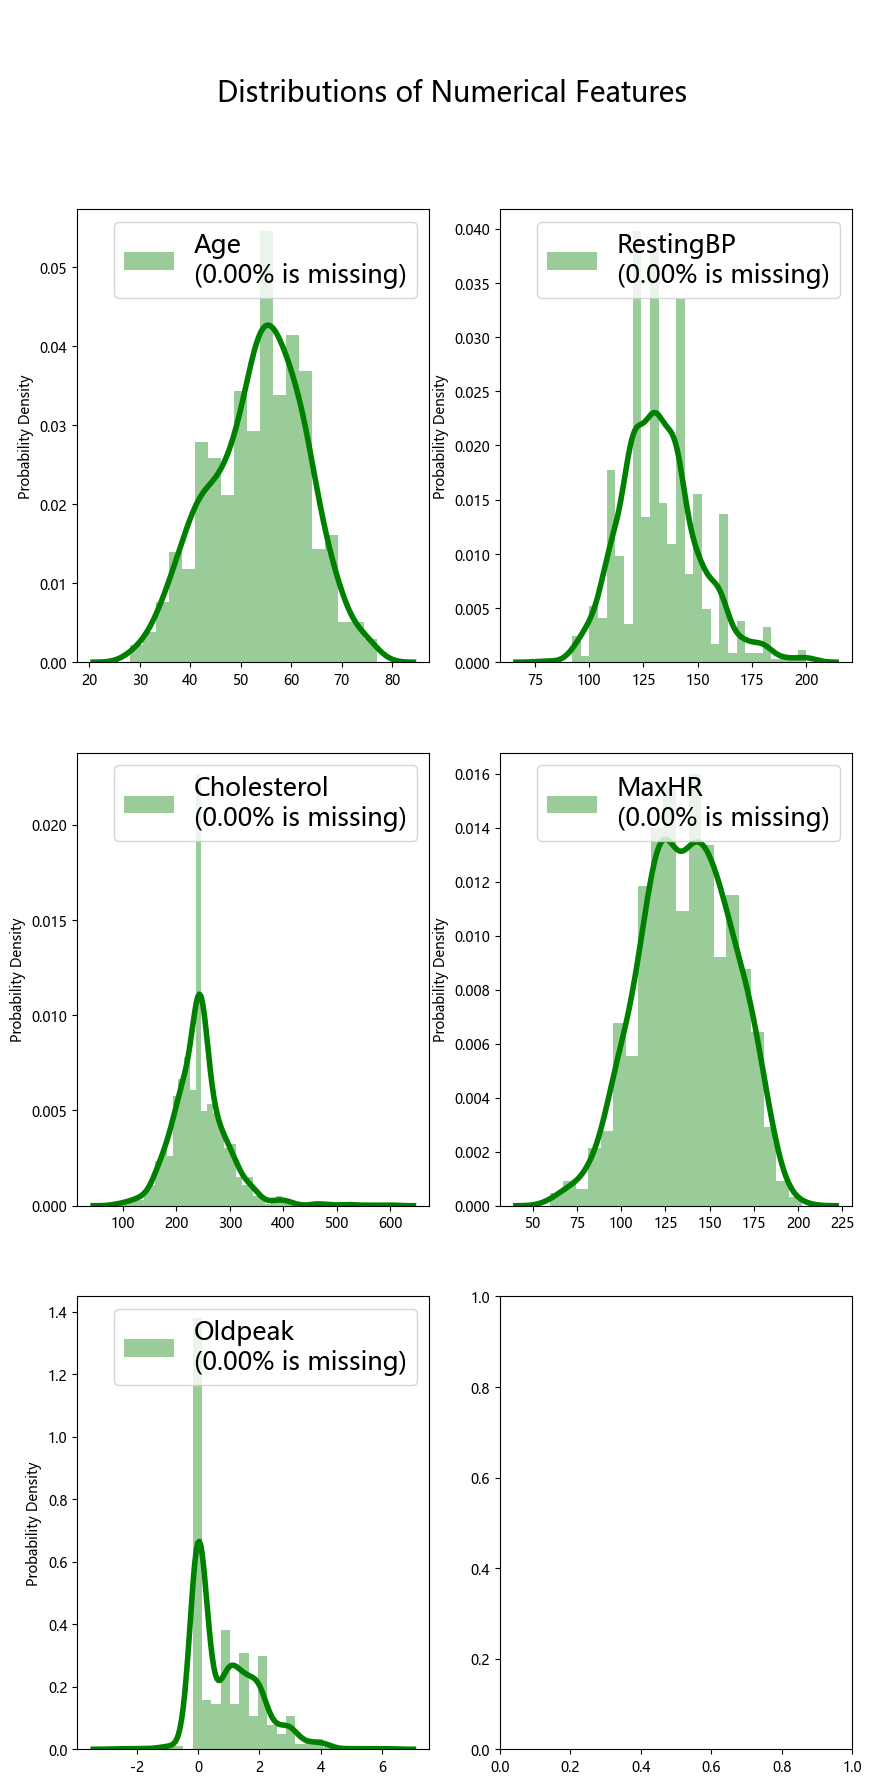

In [27]:
#一覽表視覺化，繪製 (7x2) 的圖表
#數值型欄位

#7x2的圖表
n_rows, n_cols = (3,2) #(7,2)

#每一張圖表大小為20x50
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10, 20)) #(20, 50)

#給予這張一覽表名稱
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=20)  #60
 
#走訪每一個數值型欄位
#陣列變為 index, column走訪方式，要透過enumerate
for index, column in enumerate(numeric):
    
    #index由0開始
    #例如: 5//2為2(商數)，5%2為1(餘數)
    i,j = (index // n_cols), (index % n_cols)
    
    #計算該欄位去除空值的數量除以該欄位總數量的百分比(缺失比例)
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    #文字敘述該欄位遺缺值的百分比
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    #透過seaborn的distplot針對該欄位畫圖
    #需增加常態分佈的線條
    #norm_hist常態分佈圖
    fig=sns.distplot(data[column], color="g", label=collabel, norm_hist=True,
    
    #指派圖形位置，KDE線條寬度為4
    ax=axes[i,j], kde_kws={"lw":4})
    
    #在圖片中顯示文字說明
    #顯示的位置由程式自行判斷 (loc為best)
    fig=fig.legend(loc='best', fontsize=18)
    
    #定義每張圖的y軸說明文字
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    #定義每張圖x軸說明文字為無
    axes[i,j].set_xlabel(None)

plt.show()

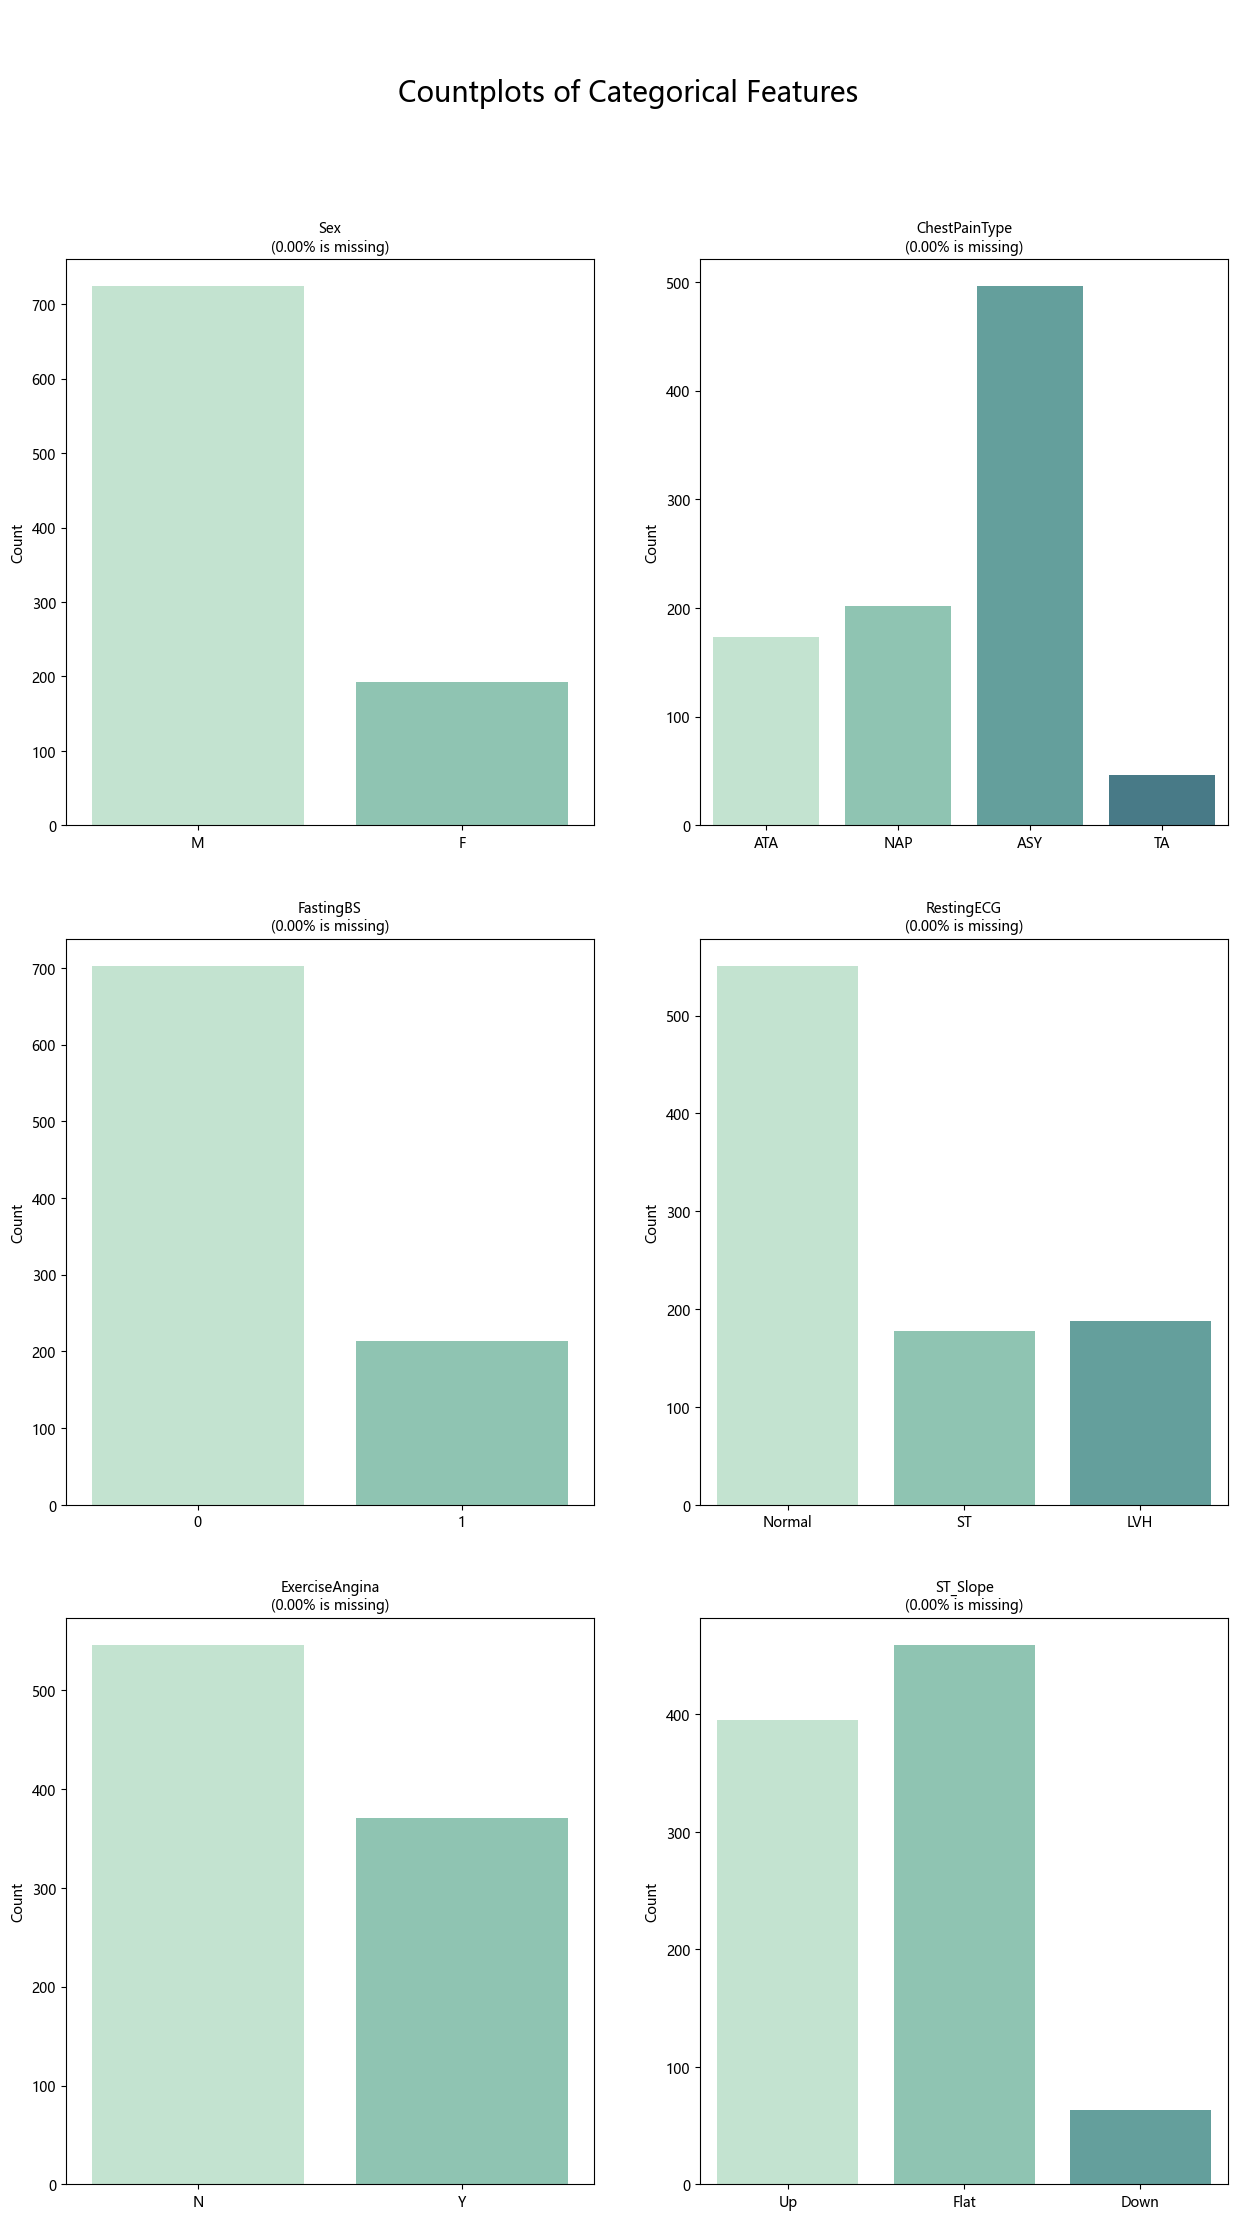

In [28]:
#類別型欄位(類別無法計算，僅能算COUNT數、比例)

n_rows, n_cols = (3,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(15, 25))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=20)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=data,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=10)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=10)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), fontsize='medium')

plt.show()

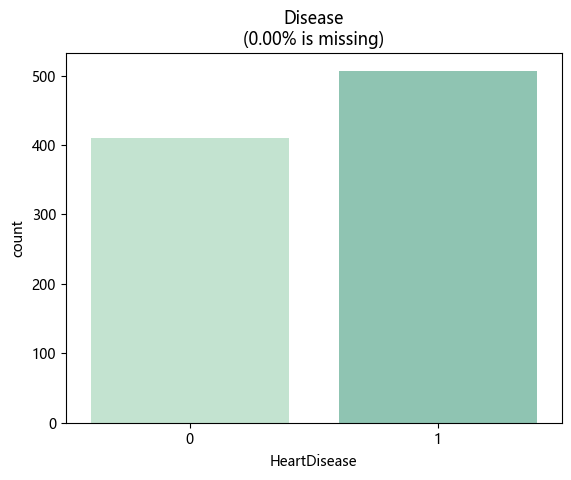

In [29]:
#應變數

miss_perc="%.2f"%(100*(1-(data['HeartDisease'].dropna().shape[0])/data.shape[0]))
    
label="Disease\n(missing:\n{}%)".format(miss_perc)

fig=sns.countplot(x=data['HeartDisease'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()

6
0
Sex
M    724
F    193
Name: Sex, dtype: int64
1
ChestPainType
ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64
2
FastingBS
0    703
1    214
Name: FastingBS, dtype: int64
3
RestingECG
Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64
4
ExerciseAngina
N    546
Y    371
Name: ExerciseAngina, dtype: int64
5
ST_Slope
Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64
1    507
0    410
Name: HeartDisease, dtype: int64


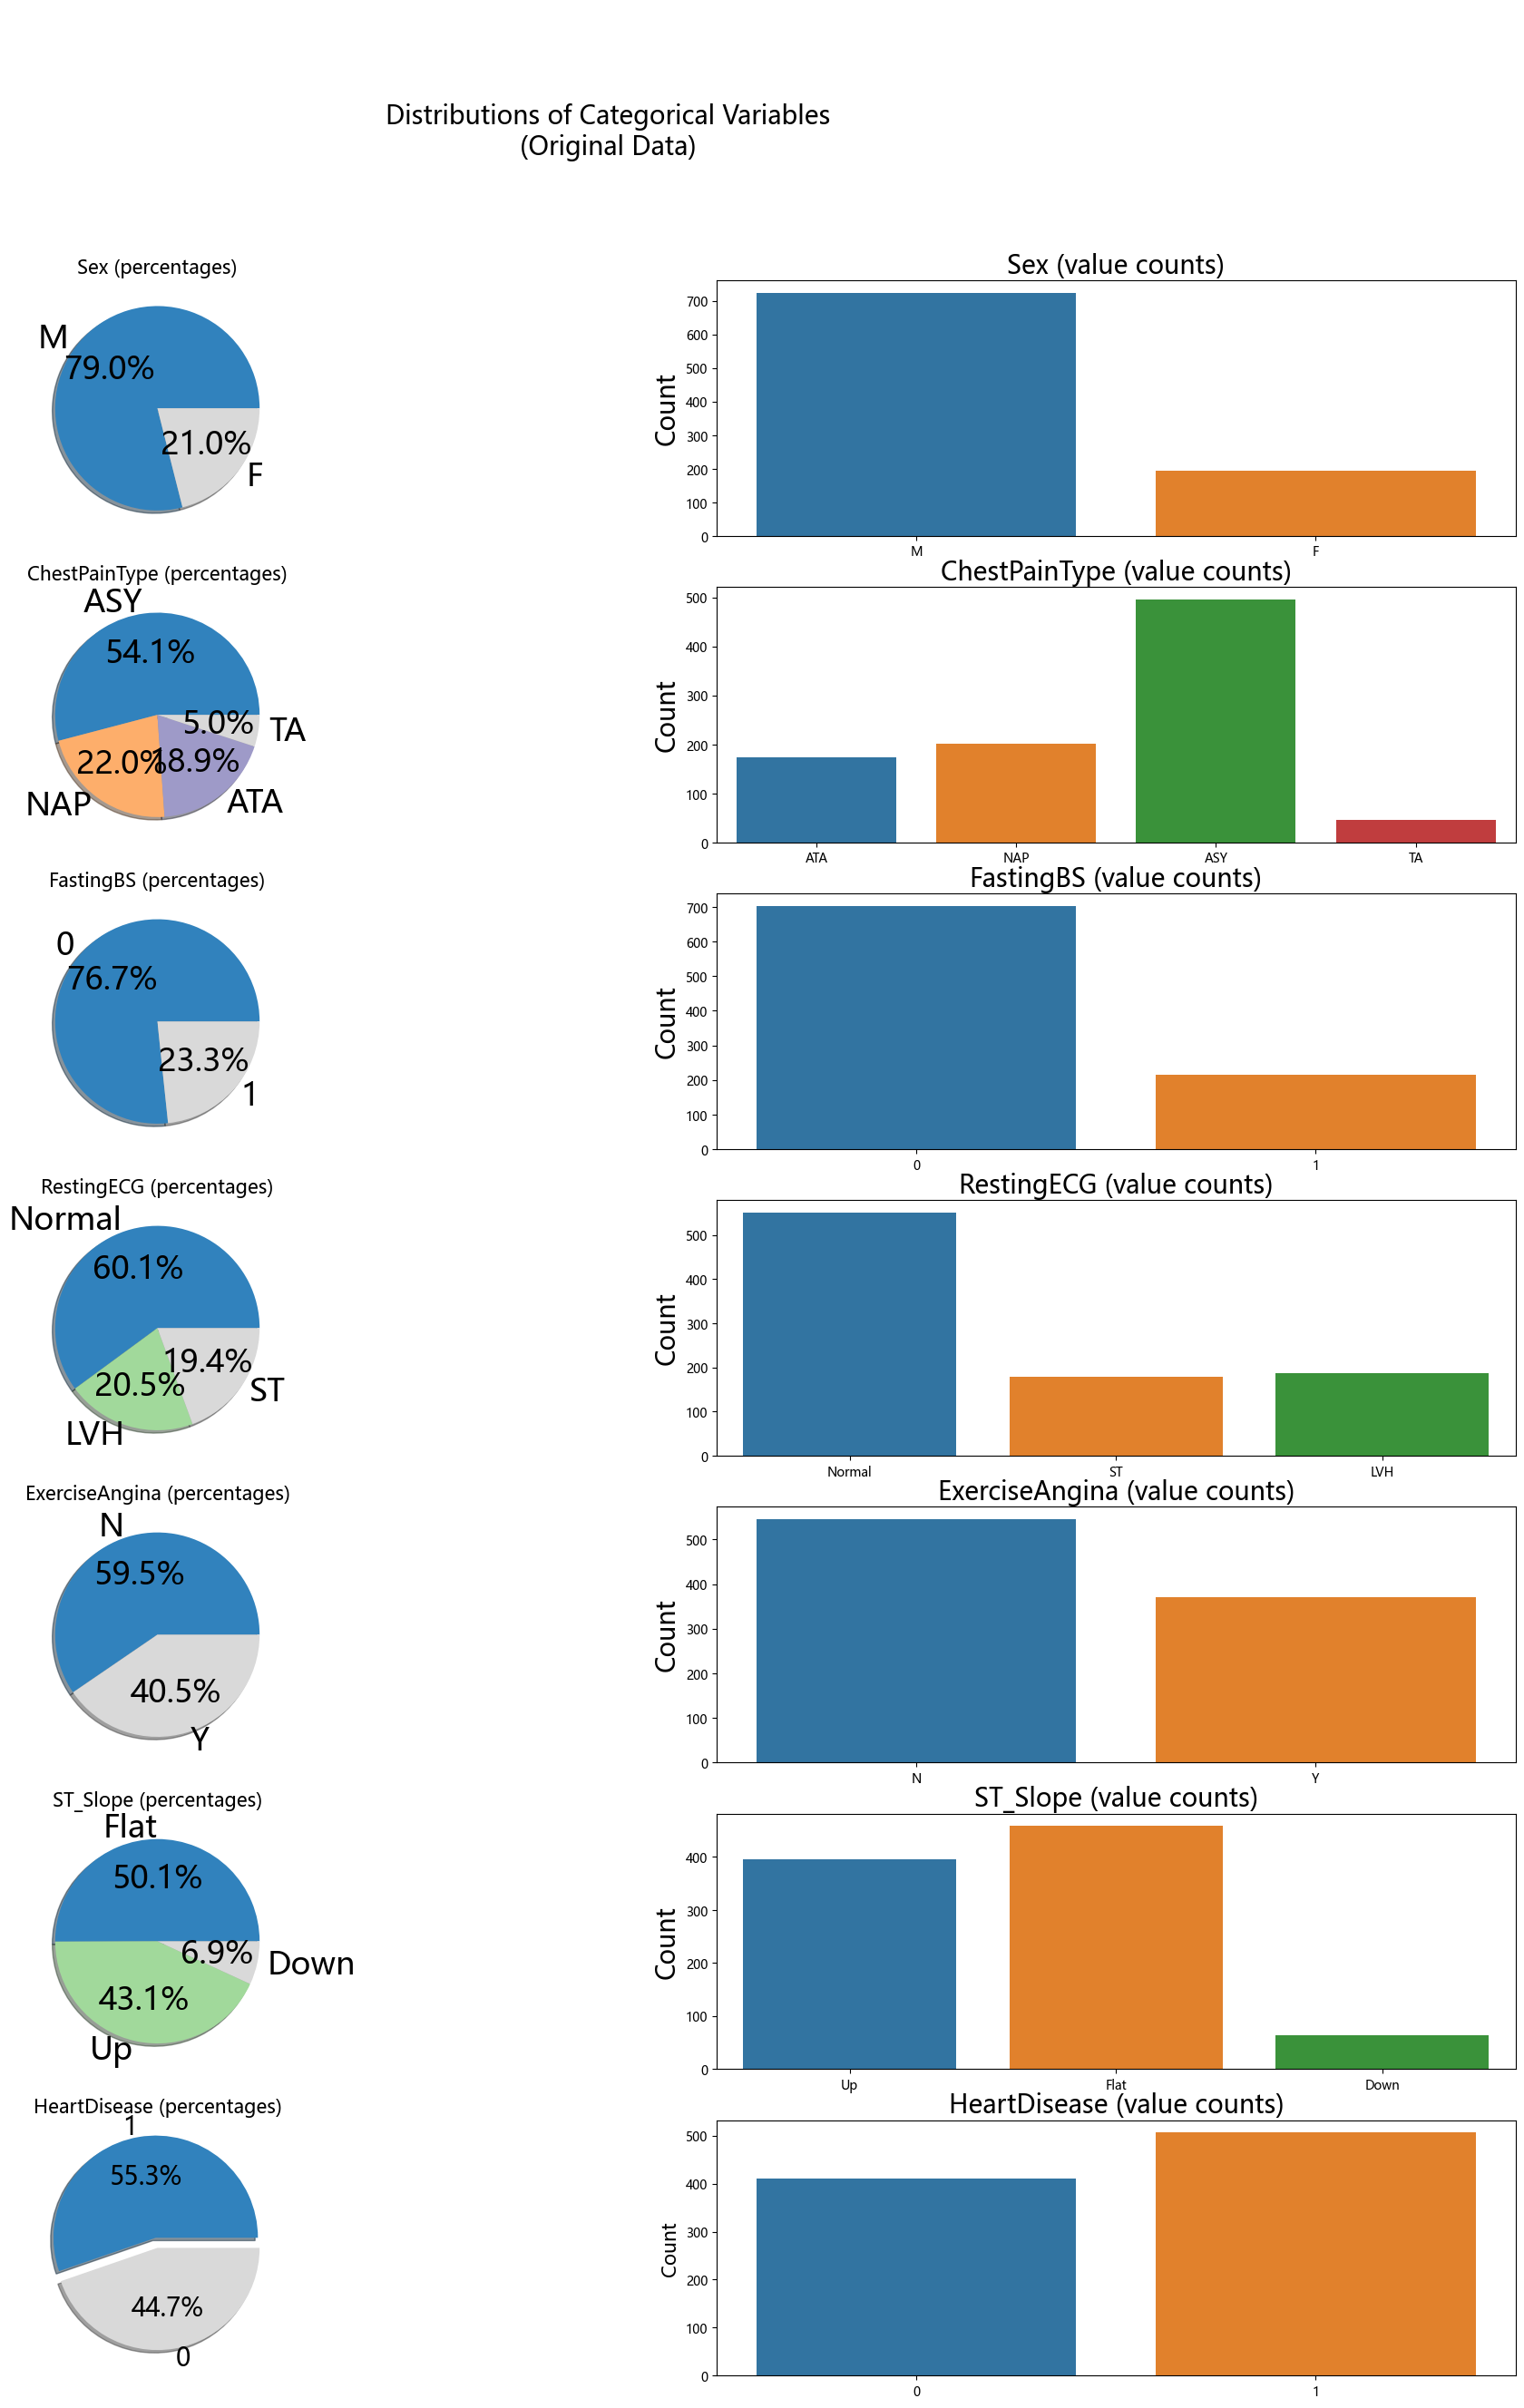

In [30]:
#塞值後觀察各欄位分布 (類別型欄位)
#row ( 垂直 )、column ( 水平 ) 
n_rows, n_cols = (7,2)

#每一張圖表大小為20x50
#nrows ( 垂直 )、ncols ( 水平 ) 和 index ( 位置 ) 
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 30))
figure.suptitle('\n\n\nDistributions of Categorical Variables\n(Original Data)', fontsize=20)

#針對每一個類別型欄位
print(len(categoricals))
for i in range(len(categoricals)):
    print(i)
    column=categoricals[i]
    print(column)
    print(data[column].value_counts())
    #畫圓餅圖
    graph1=data[column].value_counts().plot.pie(
                                                autopct='%1.1f%%', #饼块内标签，如果它是一个格式字符串，标签将是fmt % pct。如果它是一个函数，它将被调用。
                                                ax=axes[i,0],
                                                colormap="tab20c",
                                                fontsize=25,
                                                shadow=True, #陰影
                                                #如果不是None，则是一个len(x)长度的数组，指定每一块的突出程度；突出显示，设置每一块分割出来的间隙大小
                                                #每个饼块相对于饼圆半径的偏移距离
                                                #explode=[0.5,0] #突出顯示
                                               )
    #設定圓餅圖顯示資訊
    axes[i,0].set_ylabel('',fontsize=15)
    axes[i,0].set_title(column+' (percentages)', fontsize=15)
    
    #顯示長條圖(bar-chart)
    graph2=sns.countplot(x=column,
                         data=data,
                         ax=axes[i,1])
    #設定長條圖顯示資訊
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=20)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels())
    axes[i,1].set_title(column+' (value counts)', fontsize=20)
    

#針對應變數欄位(HeartDisease)進行圓餅圖
print(data['HeartDisease'].value_counts())
graph1=data['HeartDisease'].value_counts().plot.pie(autopct='%1.1f%%',
                                                              ax=axes[6,0],
                                                              colormap='tab20c',
                                                              fontsize=20,
                                                              shadow=True,
                                                              explode=[0.1,0])
axes[6,0].set_ylabel('',fontsize=15)
axes[6,0].set_title('HeartDisease (percentages)',fontsize=15)


graph2=sns.countplot(x='HeartDisease',
                     data=data,
                     ax=axes[6,1])
axes[6,1].set_xlabel(None,fontsize=15)
axes[6,1].set_ylabel("Count",fontsize=15)
axes[6,1].set_xticklabels(axes[6,1].get_xticklabels())
axes[6,1].set_title('HeartDisease (value counts)', fontsize=20)

plt.show()

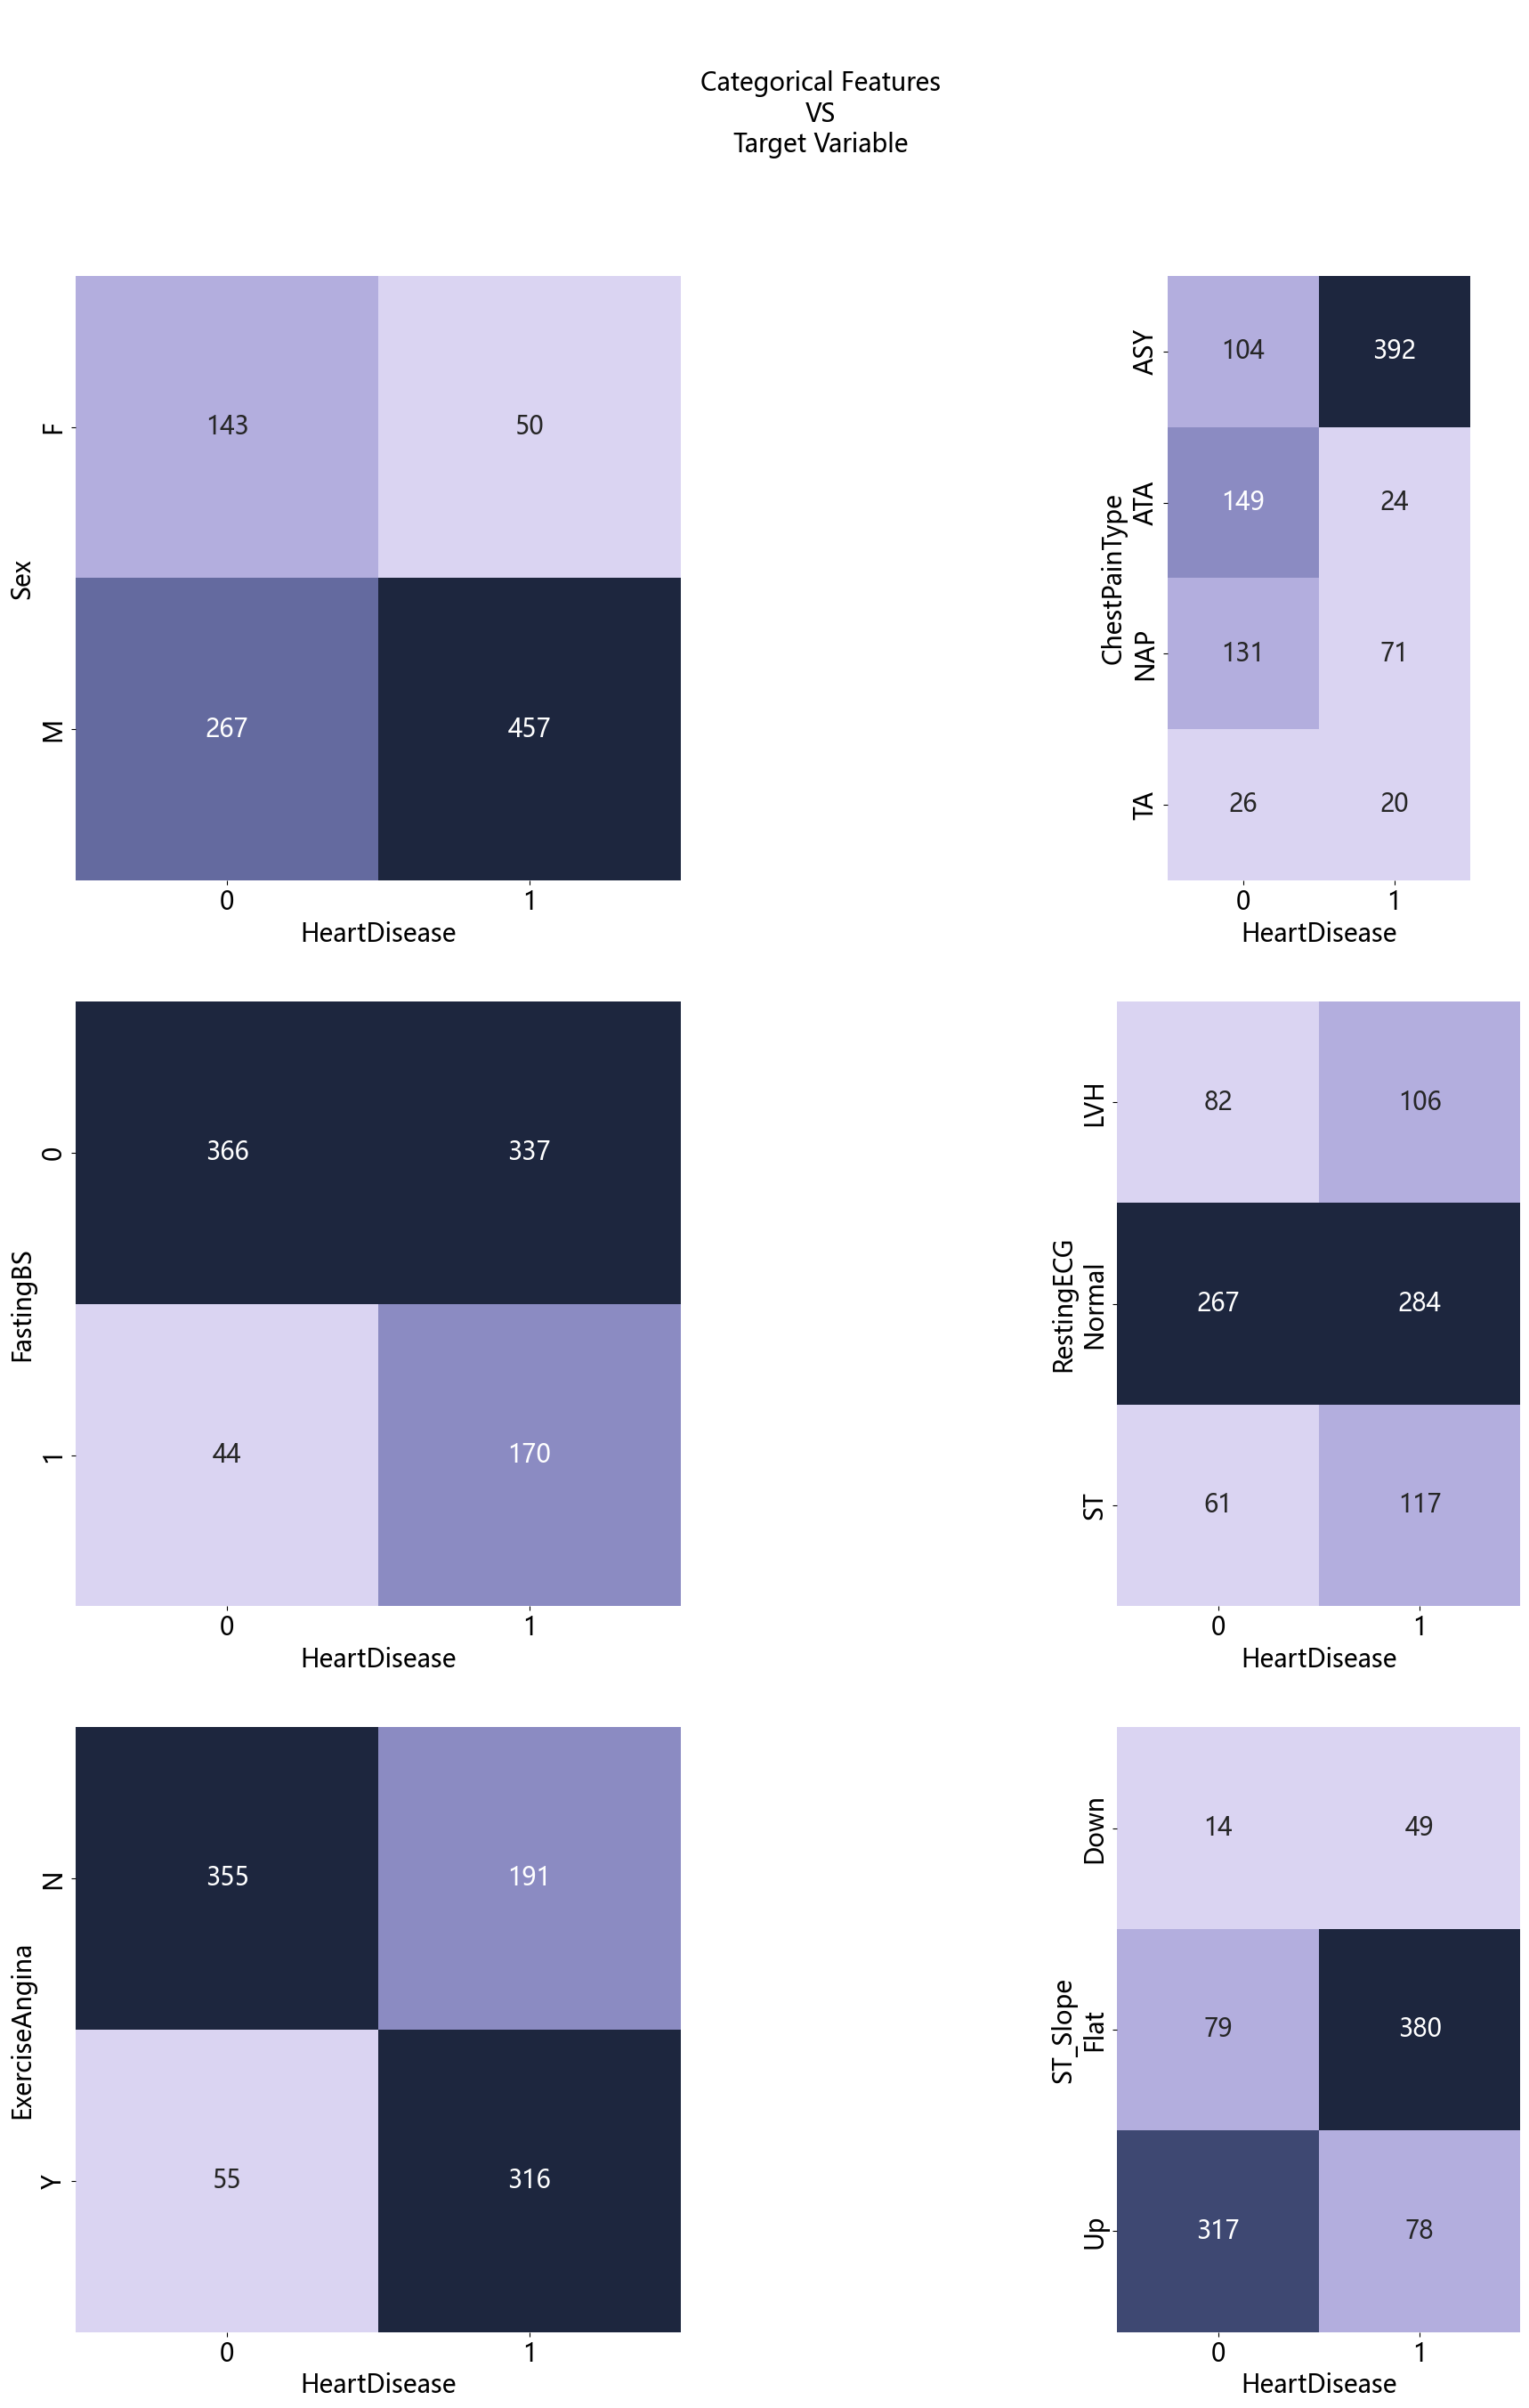

In [31]:
#類別型變數與應變數
n_rows, n_cols = (3,2)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 30))
figure.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=20)

#走訪每一個欄位
for index, column in enumerate(categoricals):
    
    i,j = (index // n_cols), (index % n_cols)
    
    #繪製熱力圖
    sns.heatmap(pd.crosstab(data[column],data['HeartDisease']),
                ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':20},
                fmt='d')
        
    axes[i,j].set_xlabel("HeartDisease", fontsize=20)

    axes[i,j].set_ylabel(column,fontsize=20)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=20)
    
    axes[i,j].set_xticklabels(["0","1"],fontsize=20)

plt.show()

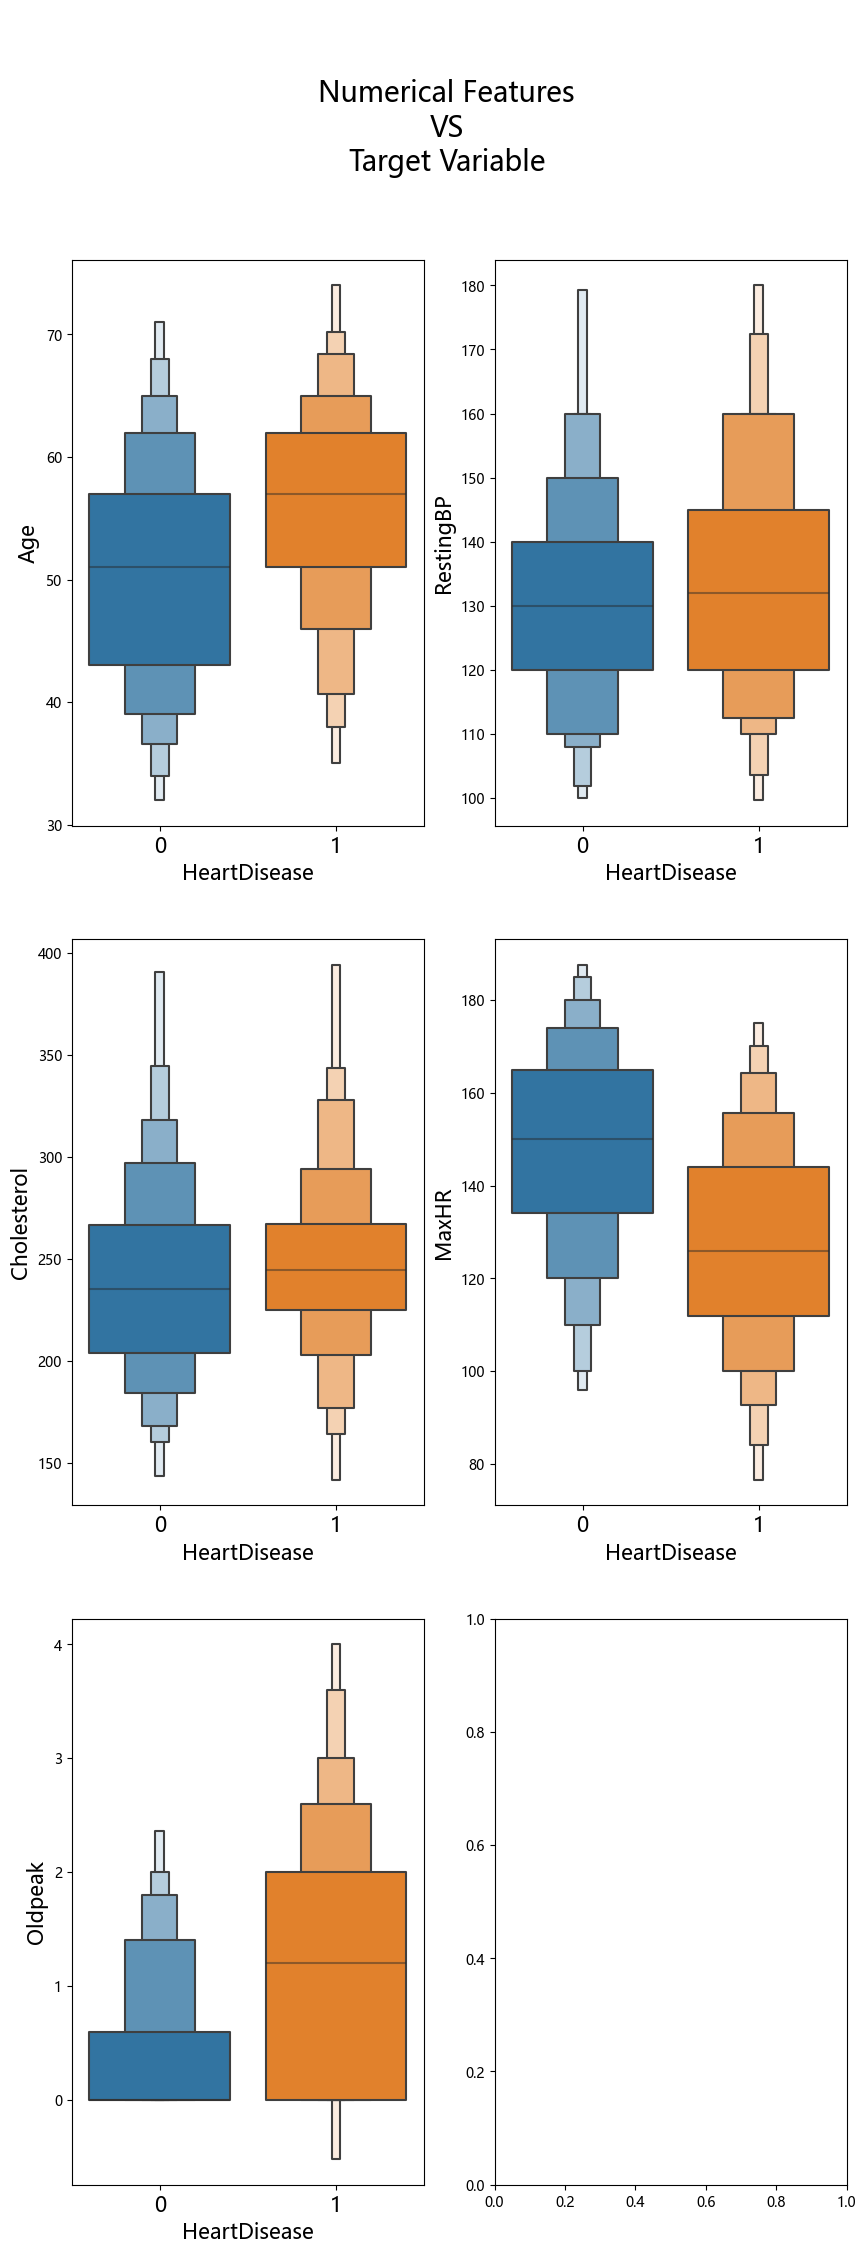

In [32]:
#連續型變數與應變數
n_rows, n_cols = (3,2)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10, 25))
figure.suptitle('\n\nNumerical Features\nVS\nTarget Variable', fontsize=20)

#走訪每一個欄位
for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    #繪製盒鬚圖
    bp=sns.boxenplot(y=column, x='HeartDisease', data=data, ax=axes[i,j], showfliers=False)
        
    axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=15)

    axes[i,j].set_ylabel(column,fontsize=15)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),fontsize=15)

plt.show()

<AxesSubplot: >

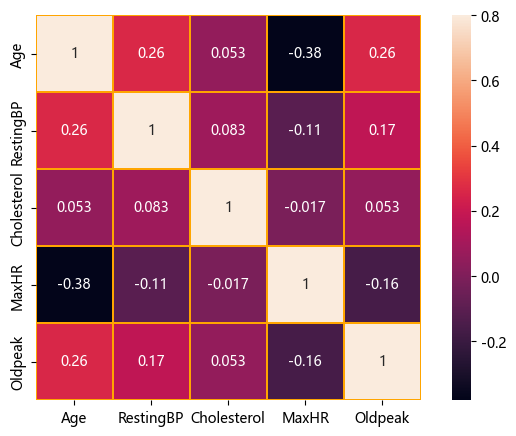

In [33]:
num_cols = data[numeric]
corr= num_cols.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, vmax=.8, linewidths=0.05, square=True, annot=True, linecolor="orange")

<AxesSubplot: >

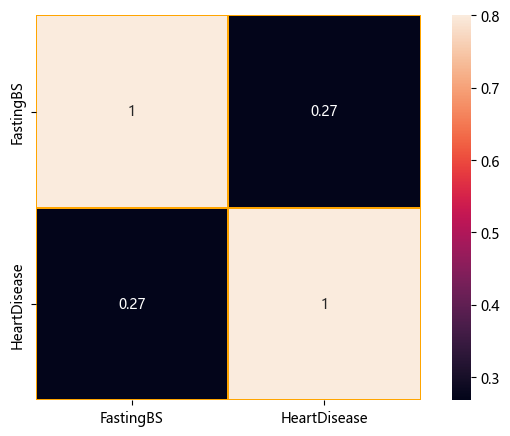

In [34]:
cat_cols = data[cat_cols]
corr= cat_cols.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, vmax=.8, linewidths=0.05, square=True, annot=True, linecolor="orange")

In [35]:
#plt.figure(figsize=(12,12))
#sns.heatmap(data.corr(),annot=True,cmap="BuPu")

<AxesSubplot: xlabel='HeartDisease', ylabel='Age'>

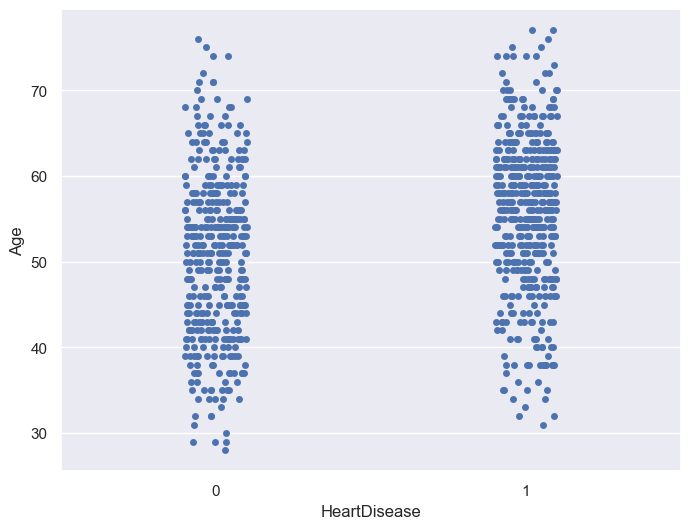

In [36]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="Age", x ="HeartDisease", data = data)

<AxesSubplot: xlabel='HeartDisease', ylabel='RestingBP'>

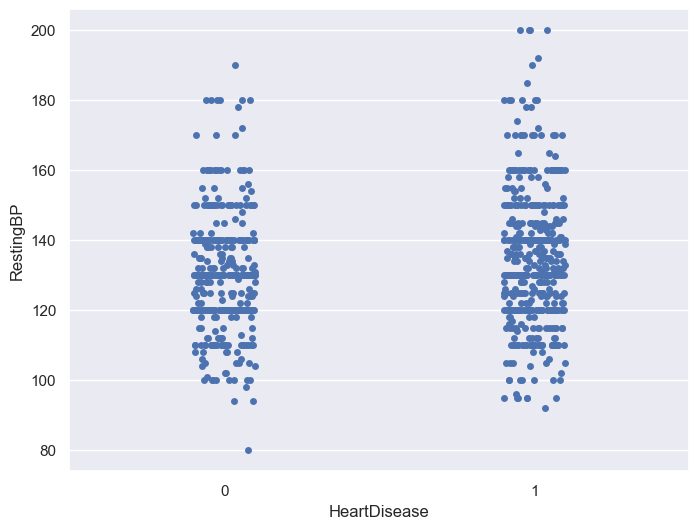

In [37]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="RestingBP", x ="HeartDisease", data = data)

In [38]:
#Handling the outliers in this column
#data = data.loc[(data["RestingBP"]>80)]
#data.head()

<AxesSubplot: xlabel='HeartDisease', ylabel='RestingBP'>

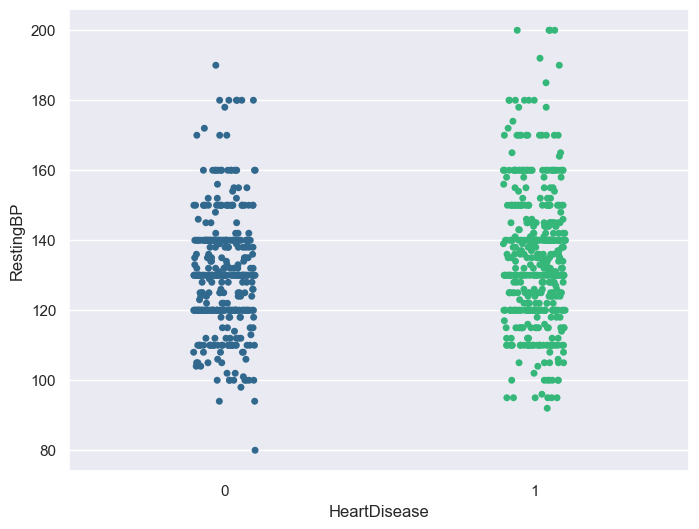

In [39]:
#re-checking for the outliers
sns.stripplot(y="RestingBP", x ="HeartDisease", data = data, palette='viridis')

<AxesSubplot: xlabel='HeartDisease', ylabel='Cholesterol'>

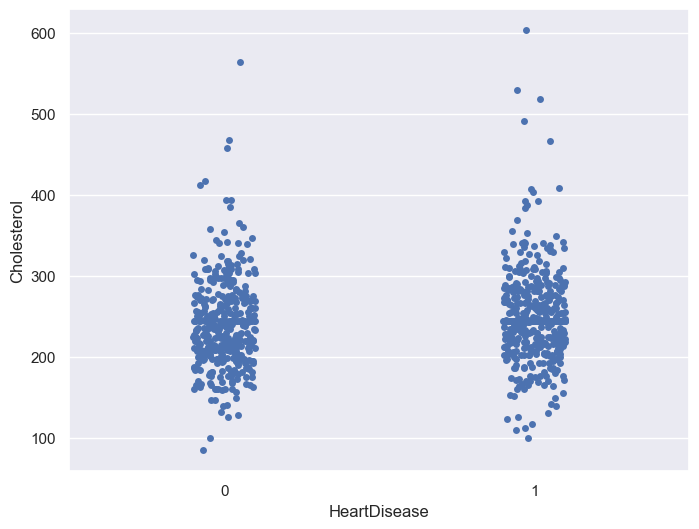

In [40]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="Cholesterol", x ="HeartDisease", data = data)

<AxesSubplot: xlabel='HeartDisease', ylabel='MaxHR'>

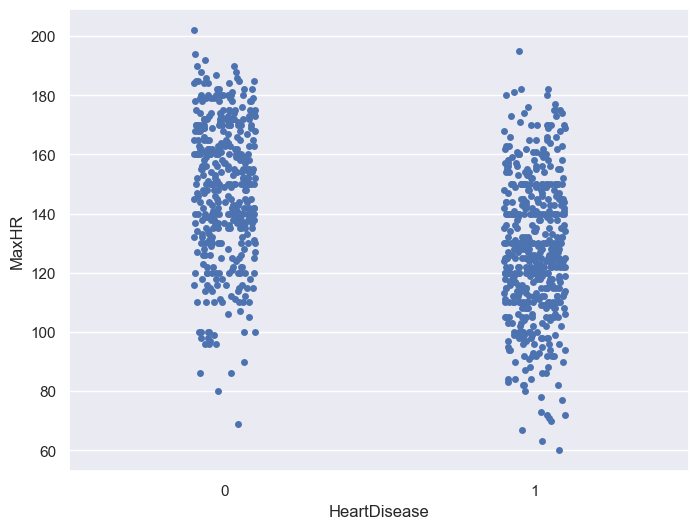

In [41]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="MaxHR", x ="HeartDisease", data = data)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 125.4+ KB


In [43]:
#性別 編碼轉換(Sex)
gender_le = LabelEncoder()
data["Sex"] = gender_le.fit_transform(data["Sex"])
data.Sex.value_counts()
#lbe =LabelEncoder()
#cat_cols["Sex"]=gender_le.fit_transform(cat_cols["Sex"])
#cat_cols.head()

1    724
0    193
Name: Sex, dtype: int64

In [44]:
#胸部疼痛類型 編碼轉換(ChestPainType)
ChestPainType_le = LabelEncoder()
data["ChestPainType"] = ChestPainType_le.fit_transform(data["ChestPainType"])
data.ChestPainType.value_counts()

0    496
2    202
1    173
3     46
Name: ChestPainType, dtype: int64

In [45]:
RestingECG_le = LabelEncoder()
data["RestingECG"] = RestingECG_le.fit_transform(data["RestingECG"])
data.RestingECG.value_counts()

1    551
0    188
2    178
Name: RestingECG, dtype: int64

In [46]:
ExerciseAngina_le = LabelEncoder()
data["ExerciseAngina"] = ExerciseAngina_le.fit_transform(data["ExerciseAngina"])
data.ExerciseAngina.value_counts()

0    546
1    371
Name: ExerciseAngina, dtype: int64

In [47]:
ST_Slope_le = LabelEncoder()
data["ST_Slope"] = ST_Slope_le.fit_transform(data["ST_Slope"])
data.ST_Slope.value_counts()

1    459
2    395
0     63
Name: ST_Slope, dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    int32  
 2   ChestPainType   917 non-null    int32  
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    int32  
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    int32  
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    int32  
 11  HeartDisease    917 non-null    int64  
dtypes: float64(2), int32(5), int64(5)
memory usage: 107.5 KB


In [49]:
#特徵資料
X=data.drop('HeartDisease',axis=1).values
#目標資料
y=data['HeartDisease'].values
X.shape

(917, 11)

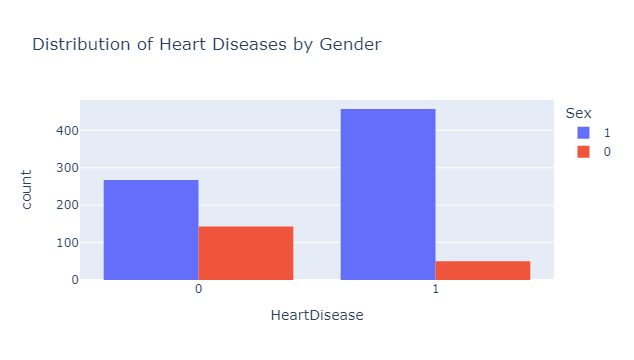

In [50]:
fig=px.histogram(data, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=data.columns,
                 title="Distribution of Heart Diseases by Gender",
                 barmode="group")
fig.show()

In [51]:
#CC = data.drop('HeartDisease',axis=1).columns
#CC

In [52]:
#feature_names = ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
#       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
#       'HeartDisease']
#feature_names 

In [53]:
#y.shape

In [54]:
#設計訓練、測試比例
#train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取train_data和test_data，形式为：
#X_train,X_test, y_train, y_test =cross_validation.train_test_split
#(train_data,train_target,test_size=0.4, random_state=0)
#train_data：所要划分的样本特征集
#train_target：所要划分的样本结果
#test_size：样本占比，如果是整数的话就是样本的数量
#random_state：是随机数的种子(该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。)。

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42,shuffle=True)

In [55]:
#'Sex'、'ExerciseAngina'即它們只取兩個值。因此，我們可以使用 0 和 1 手動編碼這些值。對於其他值，我們將使用編碼函數。
#train, test = train_test_split(data,test_size=0.3,random_state= 1234)
#
#train['Sex'] = np.where(train['Sex'] == "M", 0, 1)
#train['ExerciseAngina'] = np.where(train['ExerciseAngina'] == "N", 0, 1)
#
#test['Sex'] = np.where(test['Sex'] == "M", 0, 1)
#test['ExerciseAngina'] = np.where(test['ExerciseAngina'] == "N", 0, 1)
#
#train=pd.get_dummies(train)
#test=pd.get_dummies(test)

In [56]:
#train.shape

In [57]:
#test.shape

In [58]:
##X表示決定因變量結果的自變量/屬性集，Y. 在我們的例子中，因變量或解釋變量是HeartDisease
#X_train=train.drop(['HeartDisease'],1)
#X_test=test.drop(['HeartDisease'],1)
#
#y_train=train['HeartDisease']
#y_test=test['HeartDisease']
#print(X_train.shape)
#print(X_test.shape)

In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(458, 11)
(458,)
(459, 11)
(459,)


In [60]:
feature_names = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
feature_names 

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope']

In [61]:
# 邏輯回歸
from sklearn.linear_model import LogisticRegression
# 建立模型
model_LR=LogisticRegression()
# 訓練模型
model_LR.fit(X_train,y_train)
# 預測測試資料
y_pred_LR = model_LR.predict(X_test)
y_pred_LR[0:10]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [62]:
score_LR=accuracy_score(y_test,y_pred_LR)
print("score_LR:", score_LR)

score_LR: 0.8583877995642701


In [63]:
# 評估模型
accuracy_LR = model_LR.score(X_test, y_test)
print("Accuracy_LR:", accuracy_LR)

Accuracy_LR: 0.8583877995642701


In [64]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       193
           1       0.91      0.84      0.87       266

    accuracy                           0.86       459
   macro avg       0.85      0.86      0.86       459
weighted avg       0.86      0.86      0.86       459



In [65]:
#返回一個長度為特徵數量的數組
#每個數字代表一個特徵的重要性。數字越大，代表該特徵的重要性越高。
importances_LR = model_LR.coef_[0]
print("importances_LR: ",importances_LR)

importances_LR:  [ 0.02205545  1.38596506 -0.62924565  0.00297546  0.00297531  0.99174209
 -0.03825008 -0.01102563  0.6241516   0.44658087 -1.61027518]


In [66]:
df = pd.DataFrame({"feature": feature_names, "importance": importances_LR.reshape(-1)})
df

feature  importance
0              Age    0.022055
1              Sex    1.385965
2    ChestPainType   -0.629246
3        RestingBP    0.002975
4      Cholesterol    0.002975
5        FastingBS    0.991742
6       RestingECG   -0.038250
7            MaxHR   -0.011026
8   ExerciseAngina    0.624152
9          Oldpeak    0.446581
10        ST_Slope   -1.610275

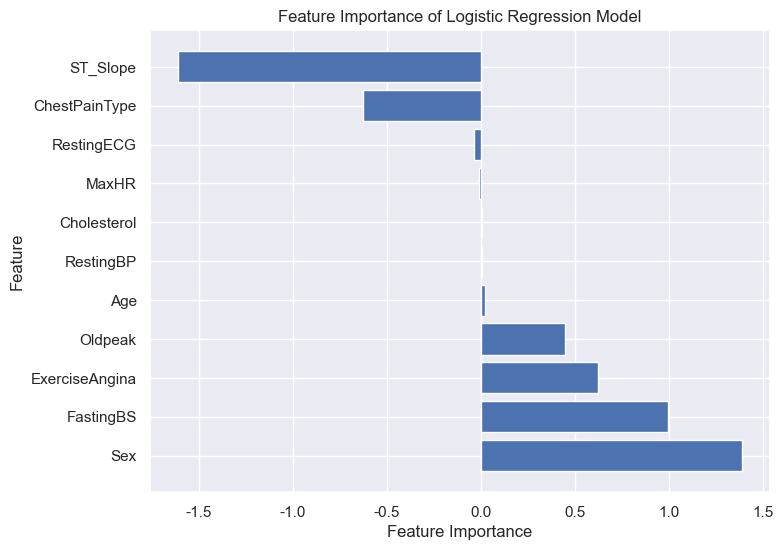

In [67]:
# 將特徵名稱和特徵重要性轉成 Pandas 的資料框
df = pd.DataFrame({"feature": feature_names, "importance": importances_LR.reshape(-1)})

# 按照特徵重要性排序
df = df.sort_values("importance", ascending=False)

# 繪製柱狀圖
plt.barh(df["feature"], df["importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of Logistic Regression Model")
plt.show()
#这是有关0和1的分类问题。请注意系数既可以为正，也可以为负。正数表示预测类别1的特征，而负数表示预测类别0的特征。

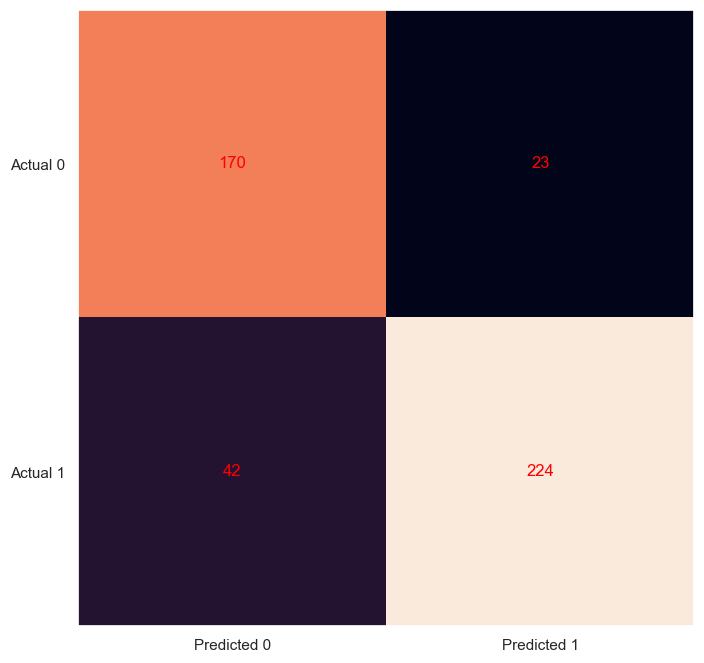

In [68]:
#confusion matrix混淆矩陣
cm_LR = confusion_matrix(y_test, y_pred_LR)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_LR)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_LR[i, j], ha='center', va='center', color='red')
plt.show()

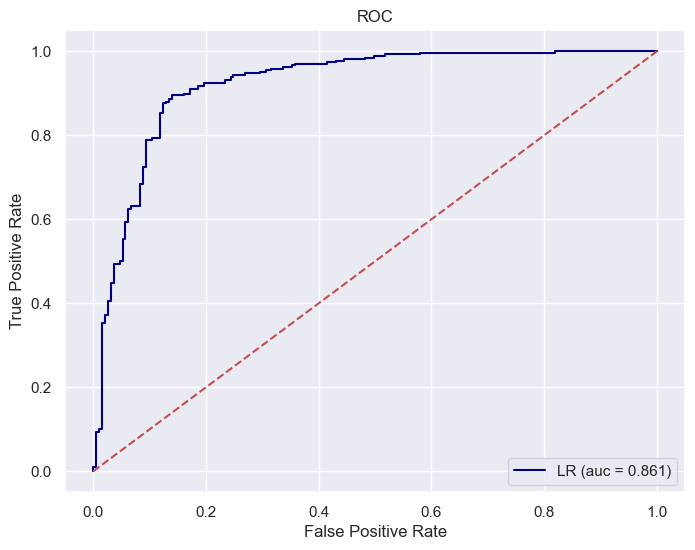

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, model_LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='LR (auc = %0.3f)' % roc_auc, color='navy')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [70]:
# 隨機森林
from sklearn.ensemble import RandomForestClassifier
# 建立 隨機森林 模型
model_RF = RandomForestClassifier()
# 使用訓練資料訓練模型
model_RF.fit(X_train, y_train)
# 使用訓練好的模型預測
y_pred_RF = model_RF.predict(X_test)
# 評估模型
accuracy_RF = model_RF.score(X_test, y_test)
print("Accuracy_RF:", accuracy_RF)

Accuracy_RF: 0.8649237472766884


In [71]:
print(classification_report(y_test,y_pred_RF))


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       193
           1       0.90      0.86      0.88       266

    accuracy                           0.86       459
   macro avg       0.86      0.87      0.86       459
weighted avg       0.87      0.86      0.87       459



In [72]:
#返回一個長度為特徵數量的數組
#每個數字代表一個特徵的重要性。數字越大，代表該特徵的重要性越高。
importances_RF = model_RF.feature_importances_
print("importances_RF: ",importances_RF)

importances_RF:  [0.08987972 0.03454157 0.10245648 0.08166982 0.08954611 0.02714326
 0.02897542 0.12998277 0.08028392 0.13573278 0.19978817]


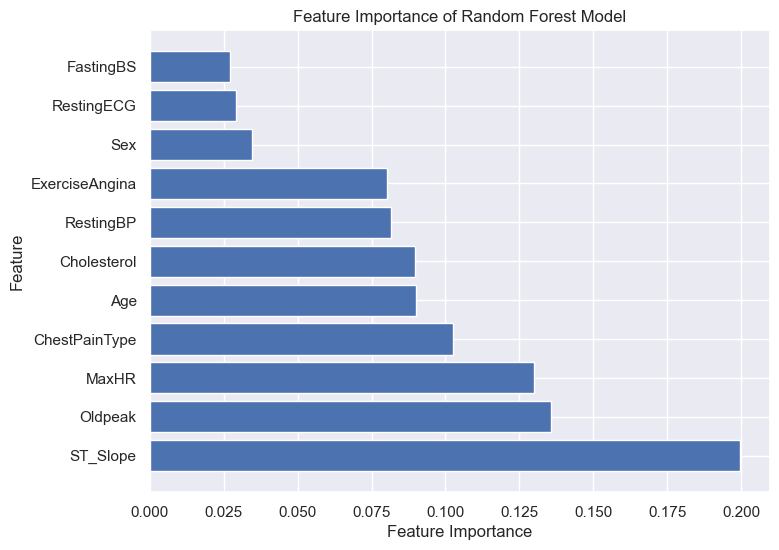

In [73]:
# 將特徵名稱和特徵重要性轉成 Pandas 的資料框
df = pd.DataFrame({"feature": feature_names, "importance": importances_RF.reshape(-1)})

# 按照特徵重要性排序
df = df.sort_values("importance", ascending=False)

# 繪製柱狀圖
plt.barh(df["feature"], df["importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of Random Forest Model")
plt.show()

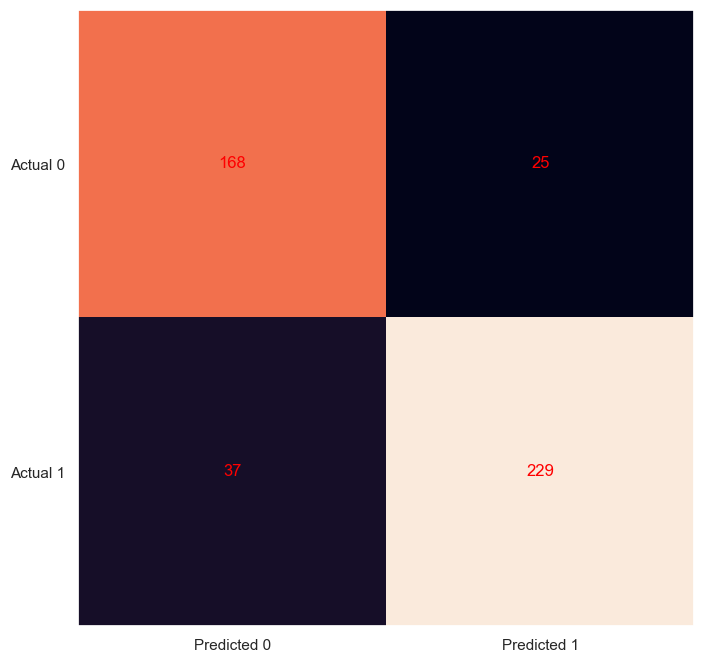

In [74]:
#confusion matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_RF)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_RF[i, j], ha='center', va='center', color='red')
plt.show()

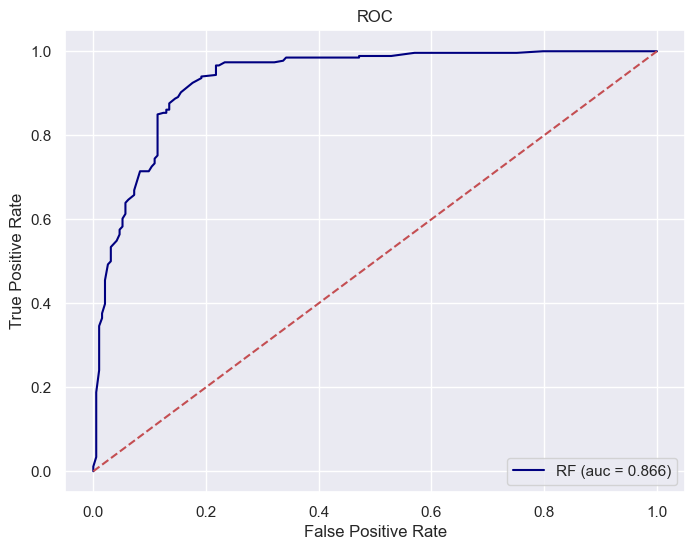

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, model_RF.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_RF.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='RF (auc = %0.3f)' % roc_auc, color='navy')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [76]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
# 建立 KNN 模型
model_KNN = KNeighborsClassifier()
# 使用訓練資料訓練模型
model_KNN.fit(X_train, y_train)
# 使用訓練好的模型預測
y_pred_KNN = model_KNN.predict(X_test)
# 評估模型
accuracy_KNN = model_KNN.score(X_test, y_test)
print("Accuracy_RF:", accuracy_KNN)

Accuracy_RF: 0.6884531590413944


In [77]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63       193
           1       0.73      0.74      0.73       266

    accuracy                           0.69       459
   macro avg       0.68      0.68      0.68       459
weighted avg       0.69      0.69      0.69       459



In [78]:
#KNN 模型並沒有一個明確的特徵重要性屬性，所以無法直接查詢 KNN 模型的特徵重要性
#使用下列2種方法取出每個特徵的重要性:

#使用變異係數 (variance) 來計算每個特徵的重要性
#使用基礎分類器 (base classifier) 來計算每個特徵的重要性

# 計算每個特徵的變異係數
#variance = np.var(X, axis=0)
## 將變異係數轉換成比例 (0~1)
#importances_KNN =(variance / np.sum(variance))
#importances_KNN

from sklearn.inspection import permutation_importance
results_KNN = permutation_importance(model_KNN, X_train, y_train, scoring='accuracy')
importances_KNN = results_KNN.importances_mean
importances_KNN

array([ 0.03231441,  0.00043668, -0.00174672,  0.0510917 ,  0.10742358,
        0.        , -0.00218341,  0.17074236,  0.00043668,  0.00131004,
       -0.00043668])

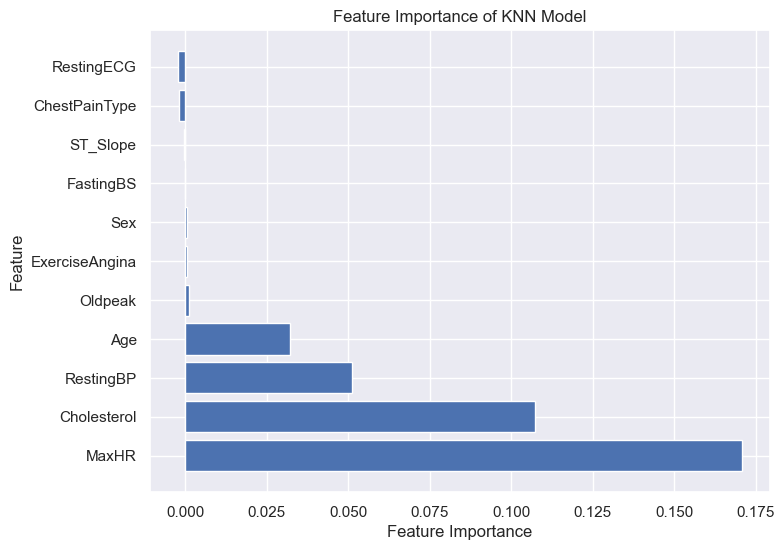

In [79]:
# 將特徵名稱和特徵重要性轉成 Pandas 的資料框
df = pd.DataFrame({"feature": feature_names, "importance": importances_KNN.reshape(-1)})

# 按照特徵重要性排序
df = df.sort_values("importance", ascending=False)

# 繪製柱狀圖
plt.barh(df["feature"], df["importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of KNN Model")
plt.show()

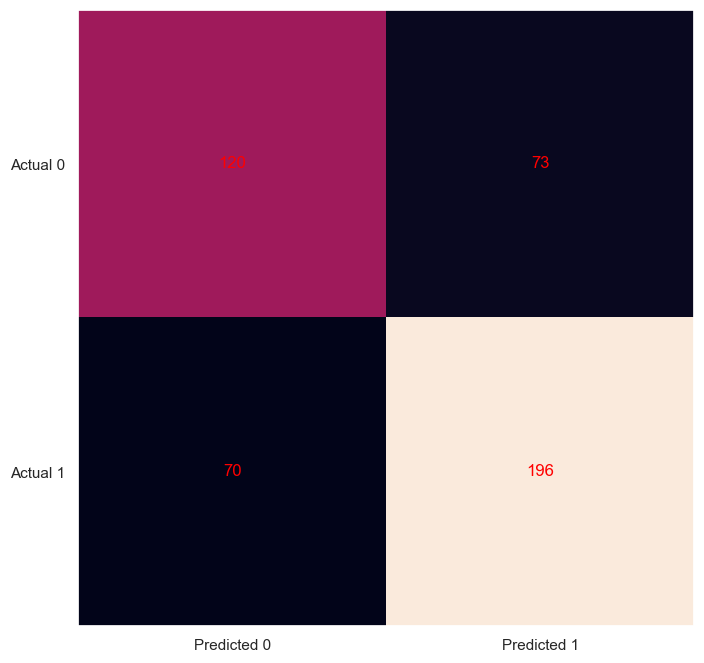

In [80]:
#confusion matrix
cm_KNN = confusion_matrix(y_test, y_pred_KNN)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_KNN)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_KNN[i, j], ha='center', va='center', color='red')
plt.show()

In [81]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 建立 Decision Tree 模型
model_DT = DecisionTreeClassifier()
# 使用訓練資料訓練模型
model_DT.fit(X_train, y_train)
# 使用訓練好的模型預測
y_pred_DT = model_DT.predict(X_test)
# 評估模型
accuracy_DT = model_DT.score(X_test, y_test)
print("Accuracy_DT:", accuracy_DT)

Accuracy_DT: 0.7995642701525054


In [82]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       193
           1       0.84      0.81      0.82       266

    accuracy                           0.80       459
   macro avg       0.79      0.80      0.80       459
weighted avg       0.80      0.80      0.80       459



In [83]:
#返回一個長度為特徵數量的數組
#每個數字代表一個特徵的重要性。數字越大，代表該特徵的重要性越高。
importances_DT = model_DT.feature_importances_
print("importances_RF: ",importances_DT)

importances_RF:  [0.03209701 0.03423176 0.04953576 0.10404758 0.09665464 0.02361137
 0.02108724 0.16426441 0.016299   0.06602915 0.39214208]


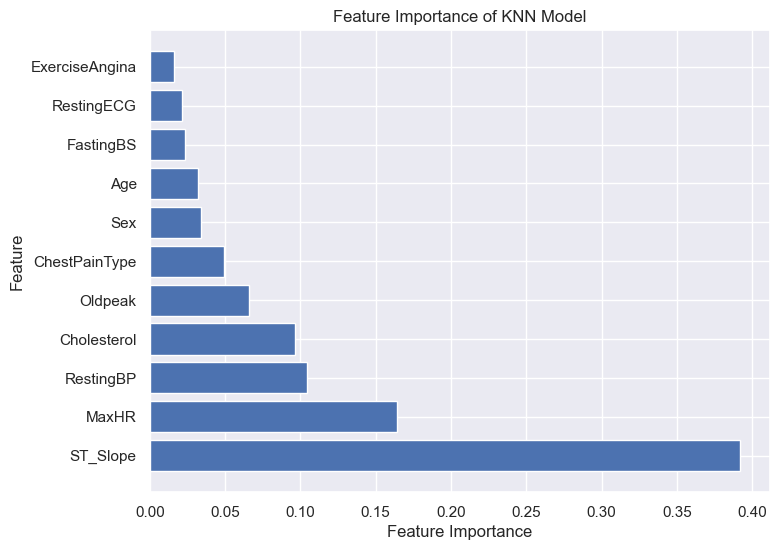

In [84]:
# 將特徵名稱和特徵重要性轉成 Pandas 的資料框
df = pd.DataFrame({"feature": feature_names, "importance": importances_DT.reshape(-1)})

# 按照特徵重要性排序
df = df.sort_values("importance", ascending=False)

# 繪製柱狀圖
plt.barh(df["feature"], df["importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of KNN Model")
plt.show()

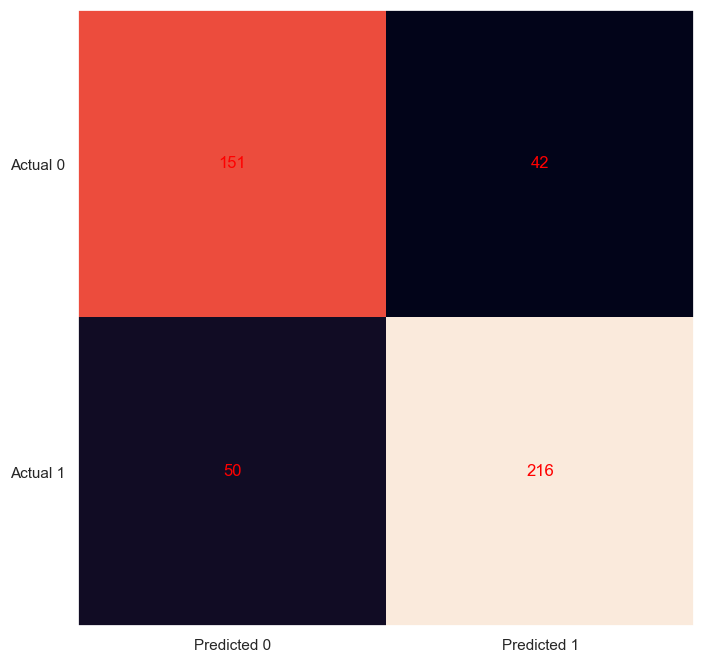

In [85]:
#confusion matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_DT)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_DT[i, j], ha='center', va='center', color='red')
plt.show()

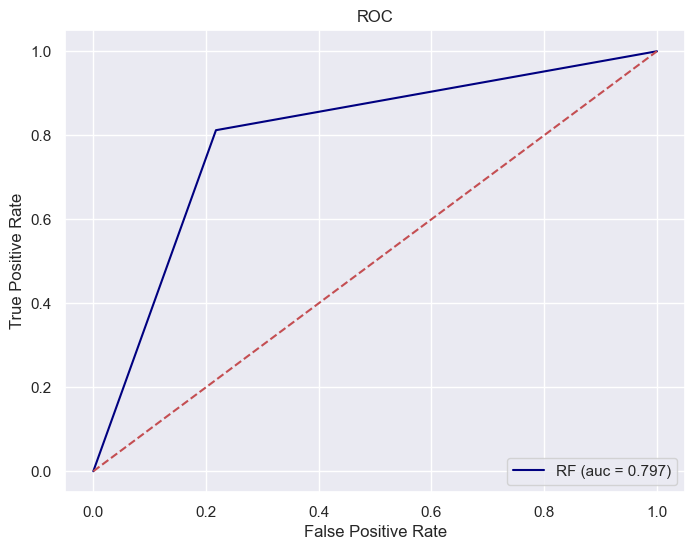

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, model_DT.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='RF (auc = %0.3f)' % roc_auc, color='navy')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [87]:
#使用 scikit-learn 套件中的 PermutationImportance 類別來計算。
#需要導入 PermutationImportance 類別以及其他必要的套件
#from sklearn.inspection import PermutationImportance
#from sklearn.ensemble import RandomForestClassifier

# 支援向量機SVM 
from sklearn.svm import SVC
# 建立 SVM 模型
model_SVM= SVC(kernel='linear',probability=True)
# 使用訓練資料訓練模型
model_SVM.fit(X_train,y_train)
#查詢 SVM 模型的特徵重要性時用到
# 建立 PermutationImportance 物件
#perm = PermutationImportance(model_SVM, random_state=42)
#perm.fit(X_train,y_train)
# 使用訓練好的模型預測
y_pred_SVM  = model_SVM.predict(X_test) 


# 評估模型
accuracy_SVM = model_SVM.score(X_test, y_test)
print("Accuracy_SVM:", accuracy_SVM)


Accuracy_SVM: 0.8605664488017429


In [88]:
print(classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       193
           1       0.90      0.85      0.88       266

    accuracy                           0.86       459
   macro avg       0.86      0.86      0.86       459
weighted avg       0.86      0.86      0.86       459



In [89]:
#查詢 SVM 模型的特徵重要性
importances_SVM = model_SVM.coef_
print("importances_SVM: ",importances_SVM)

importances_SVM:  [[ 0.01193958  1.         -0.28544128 -0.00173073  0.00212156  0.57615988
   0.01427253 -0.0059533   0.3159007   0.33928105 -1.39129641]]


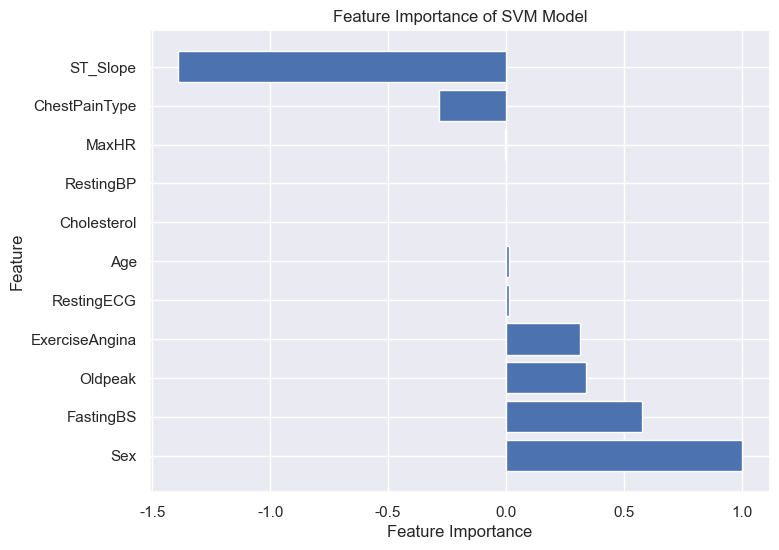

In [90]:
# 將特徵名稱和特徵重要性轉成 Pandas 的資料框
df_SVM = pd.DataFrame({"feature": feature_names, "importance": importances_SVM.reshape(-1)})

# 按照特徵重要性排序
df_SVM = df_SVM.sort_values("importance", ascending=False)

# 繪製柱狀圖
plt.barh(df_SVM["feature"], df_SVM["importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of SVM Model")
plt.show()

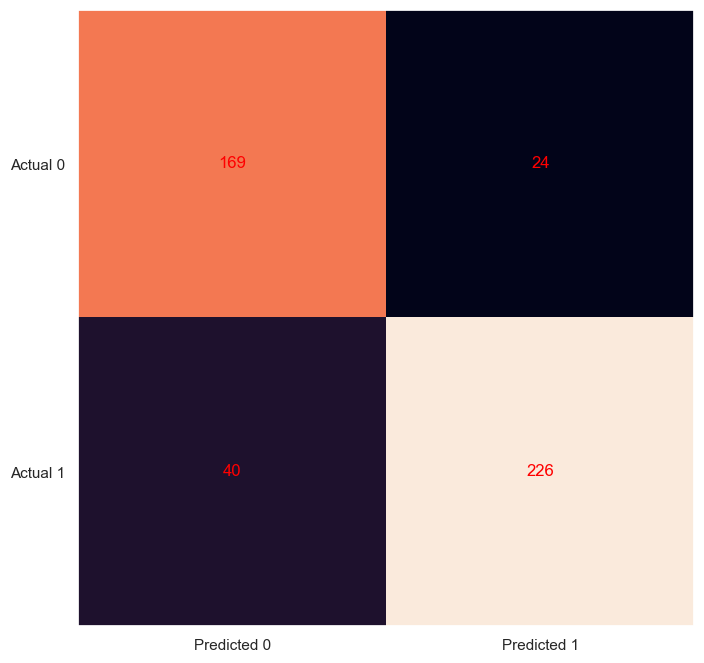

In [91]:
#confusion matrix
cm_SVM = confusion_matrix(y_test, y_pred_SVM)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_SVM)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_SVM[i, j], ha='center', va='center', color='red')
plt.show()

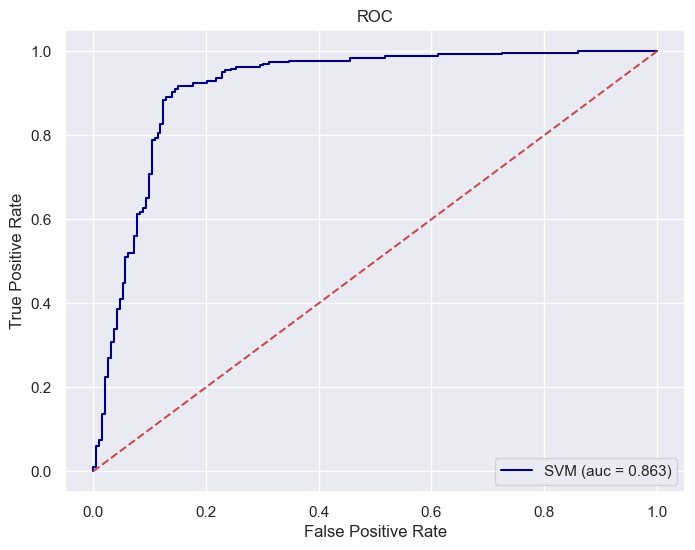

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, model_SVM.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_SVM.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='SVM (auc = %0.3f)' % roc_auc, color='navy')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [93]:
##繪製ROC曲線圖
#from sklearn.metrics import roc_curve, roc_auc_score, auc
## 建立第一個模型(邏輯回歸)
#fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_LR)
## 建立第二個模型(隨機森林)
#fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_RF)
## 建立第三個模型(KNN)
#fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_KNN)
## 建立第四個模型(Decision Tree)
#fpr4, tpr4, threshold4 = roc_curve(y_test,y_pred_DT)
#auc1 = auc(fpr1, tpr1)
#auc2 = auc(fpr2, tpr2)
#auc3 = auc(fpr3, tpr3)
#auc4 = auc(fpr4, tpr4)
#print(fpr1, tpr1, threshold1, auc1)
#print(fpr2, tpr2, threshold2, auc2)
#print(fpr3, tpr3, threshold3, auc3)
#print(fpr4, tpr4, threshold4, auc4)

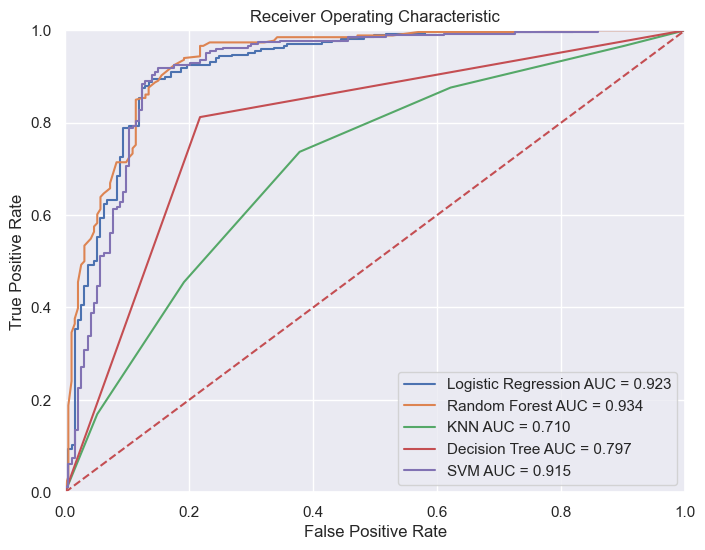

In [96]:
#繪製ROC曲線圖
from sklearn.metrics import roc_curve, roc_auc_score, auc
# 建立第一個模型(邏輯回歸)
fpr1, tpr1, thresholds1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1])
# 建立第二個模型(隨機森林)
fpr2, tpr2, thresholds2 = roc_curve(y_test, model_RF.predict_proba(X_test)[:,1])
# 建立第三個模型(KNN)
fpr3, tpr3, thresholds3 = roc_curve(y_test, model_KNN.predict_proba(X_test)[:,1])
# 建立第四個模型(Decision Tree)
fpr4, tpr4, thresholds4 = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
# 建立第五個模型(SVM)
fpr5, tpr5, thresholds5 = roc_curve(y_test, model_SVM.predict_proba(X_test)[:,1])

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)
auc4 = auc(fpr4, tpr4)
auc5 = auc(fpr5, tpr5)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, label = 'Logistic Regression AUC = %0.3f' % auc1)
plt.plot(fpr2, tpr2, label = 'Random Forest AUC = %0.3f' % auc2)
plt.plot(fpr3, tpr3, label = 'KNN AUC = %0.3f' % auc3)
plt.plot(fpr4, tpr4, label = 'Decision Tree AUC = %0.3f' % auc4)
plt.plot(fpr5, tpr5, label = 'SVM AUC = %0.3f' % auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

#plt.plot(fpr1, tpr1, label='Logistic Regression')
#plt.plot(fpr2, tpr2, label='Random Forest')
#plt.plot(fpr3, tpr3, label='KNN')
#plt.plot(fpr4, tpr4, label='Decision Tree')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.legend()
#plt.show()